In [1]:
import numpy as np
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import contractions

In [2]:
df=pd.read_csv('C:/Users/HP/Desktop/hotel_reviews - hotel_reviews.csv')

In [3]:
df.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [4]:
# EDA

In [5]:
import re

In [6]:
def cleantext(text):
    text = re.sub(r"â€™", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"\w*\d\w*", "", text) # Remove numbers
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text = re.sub(r"______________", "", text) # Remove _____
    text=re.sub(r"^a-zA-z0-9","",text)
    text=re.sub(r"[^\w\s]","",text)
    
    return text

In [7]:
df['Review']=df.apply(lambda x: cleantext(x['Review']),axis=1)

In [8]:
df['Review']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not  experience hotel monaco seattl...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret  time staying charm not star ...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside desk staff n...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking ca nt believe excellent ratings...
Name: Review, Length: 20491, dtype: object

In [9]:
import contractions

In [10]:
df['no_contract'] = df['Review'].apply(lambda x: [contractions.fix(word) for word in x.split()])


In [11]:
df['no_contract']

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, not, experience, hotel, monaco, ...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, time, staying, charm, not...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, just, looks, nice, modern, outside, desk,...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, nt, believe, excellent, ...
Name: no_contract, Length: 20491, dtype: object

In [12]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not  experience hotel monaco seattl...       3   
3  unique great stay wonderful time hotel monaco ...       5   
4  great stay great stay went seahawk game awesom...       5   

                                         no_contract  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, rooms, not, experience, hotel, monaco, ...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...

In [13]:
df['expandedtext']=[' '.join(map(str,i)) for i in df['no_contract']]

In [14]:
df['expandedtext']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not experience hotel monaco seattle...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret time staying charm not star c...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside desk staff n...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking ca nt believe excellent ratings...
Name: expandedtext, Length: 20491, dtype: object

In [15]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not  experience hotel monaco seattl...       3   
3  unique great stay wonderful time hotel monaco ...       5   
4  great stay great stay went seahawk game awesom...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                        expandedtext  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice rooms not experience hotel monaco seattle...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...

# tokenization

In [17]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import nltk

In [19]:
from nltk.tokenize import word_tokenize

In [20]:
df['tokenized'] = df['expandedtext'].apply(word_tokenize)

In [21]:
df['tokenized']

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, not, experience, hotel, monaco, ...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, time, staying, charm, not...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, just, looks, nice, modern, outside, desk,...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, nt, believe, excellent, ...
Name: tokenized, Length: 20491, dtype: object

In [22]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not  experience hotel monaco seattl...       3   
3  unique great stay wonderful time hotel monaco ...       5   
4  great stay great stay went seahawk game awesom...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                        expandedtext  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not experience hotel monaco seattle...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, rooms, not, experience, hotel, monaco, ...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...

# upper to lower case char

In [24]:
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])

In [25]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not  experience hotel monaco seattl...       3   
3  unique great stay wonderful time hotel monaco ...       5   
4  great stay great stay went seahawk game awesom...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                        expandedtext  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not experience hotel monaco seattle...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, rooms, not, experience, hotel, monaco, ...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...

In [26]:
import nltk
from nltk.corpus import stopwords


In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stop= set(stopwords.words('english'))

In [29]:
df['stopw'] = df['expandedtext'].apply(lambda x: len([i for i in x.split() if i not in stop]))

In [30]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not  experience hotel monaco seattl...       3   
3  unique great stay wonderful time hotel monaco ...       5   
4  great stay great stay went seahawk game awesom...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                        expandedtext  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not experience hotel monaco seattle...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopw  
0  [nice, hotel, expensive, parking, got, good, d...     80  
1  [ok, nothing, special, charge, diamond, member...    228  
2  [nice, rooms, not, experience, hotel, monaco, ...    195  
3  [unique, great, stay, wonderful, time, hotel, ...     85  
4  [great, stay, great, stay, went, seahawk, game...    178

In [31]:
df['stopwords_removed'] = df['expandedtext'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))

In [32]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not  experience hotel monaco seattl...       3   
3  unique great stay wonderful time hotel monaco ...       5   
4  great stay great stay went seahawk game awesom...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                        expandedtext  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not experience hotel monaco seattle...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopw  \
0  [nice, hotel, expensive, parking, got, good, d...     80   
1  [ok, nothing, special, charge, diamond, member...    228   
2  [nice, rooms, not, experience, hotel, monaco, ...    195   
3  [unique, great, stay, wonderful, time, hotel, ...     85   
4  [great, stay, great, stay, went, seahawk, game...    178   

                                   stopwords_removed  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice rooms experience hotel monaco seattle goo...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [34]:
wordc=' '.join(df['stopwords_removed'])

In [35]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

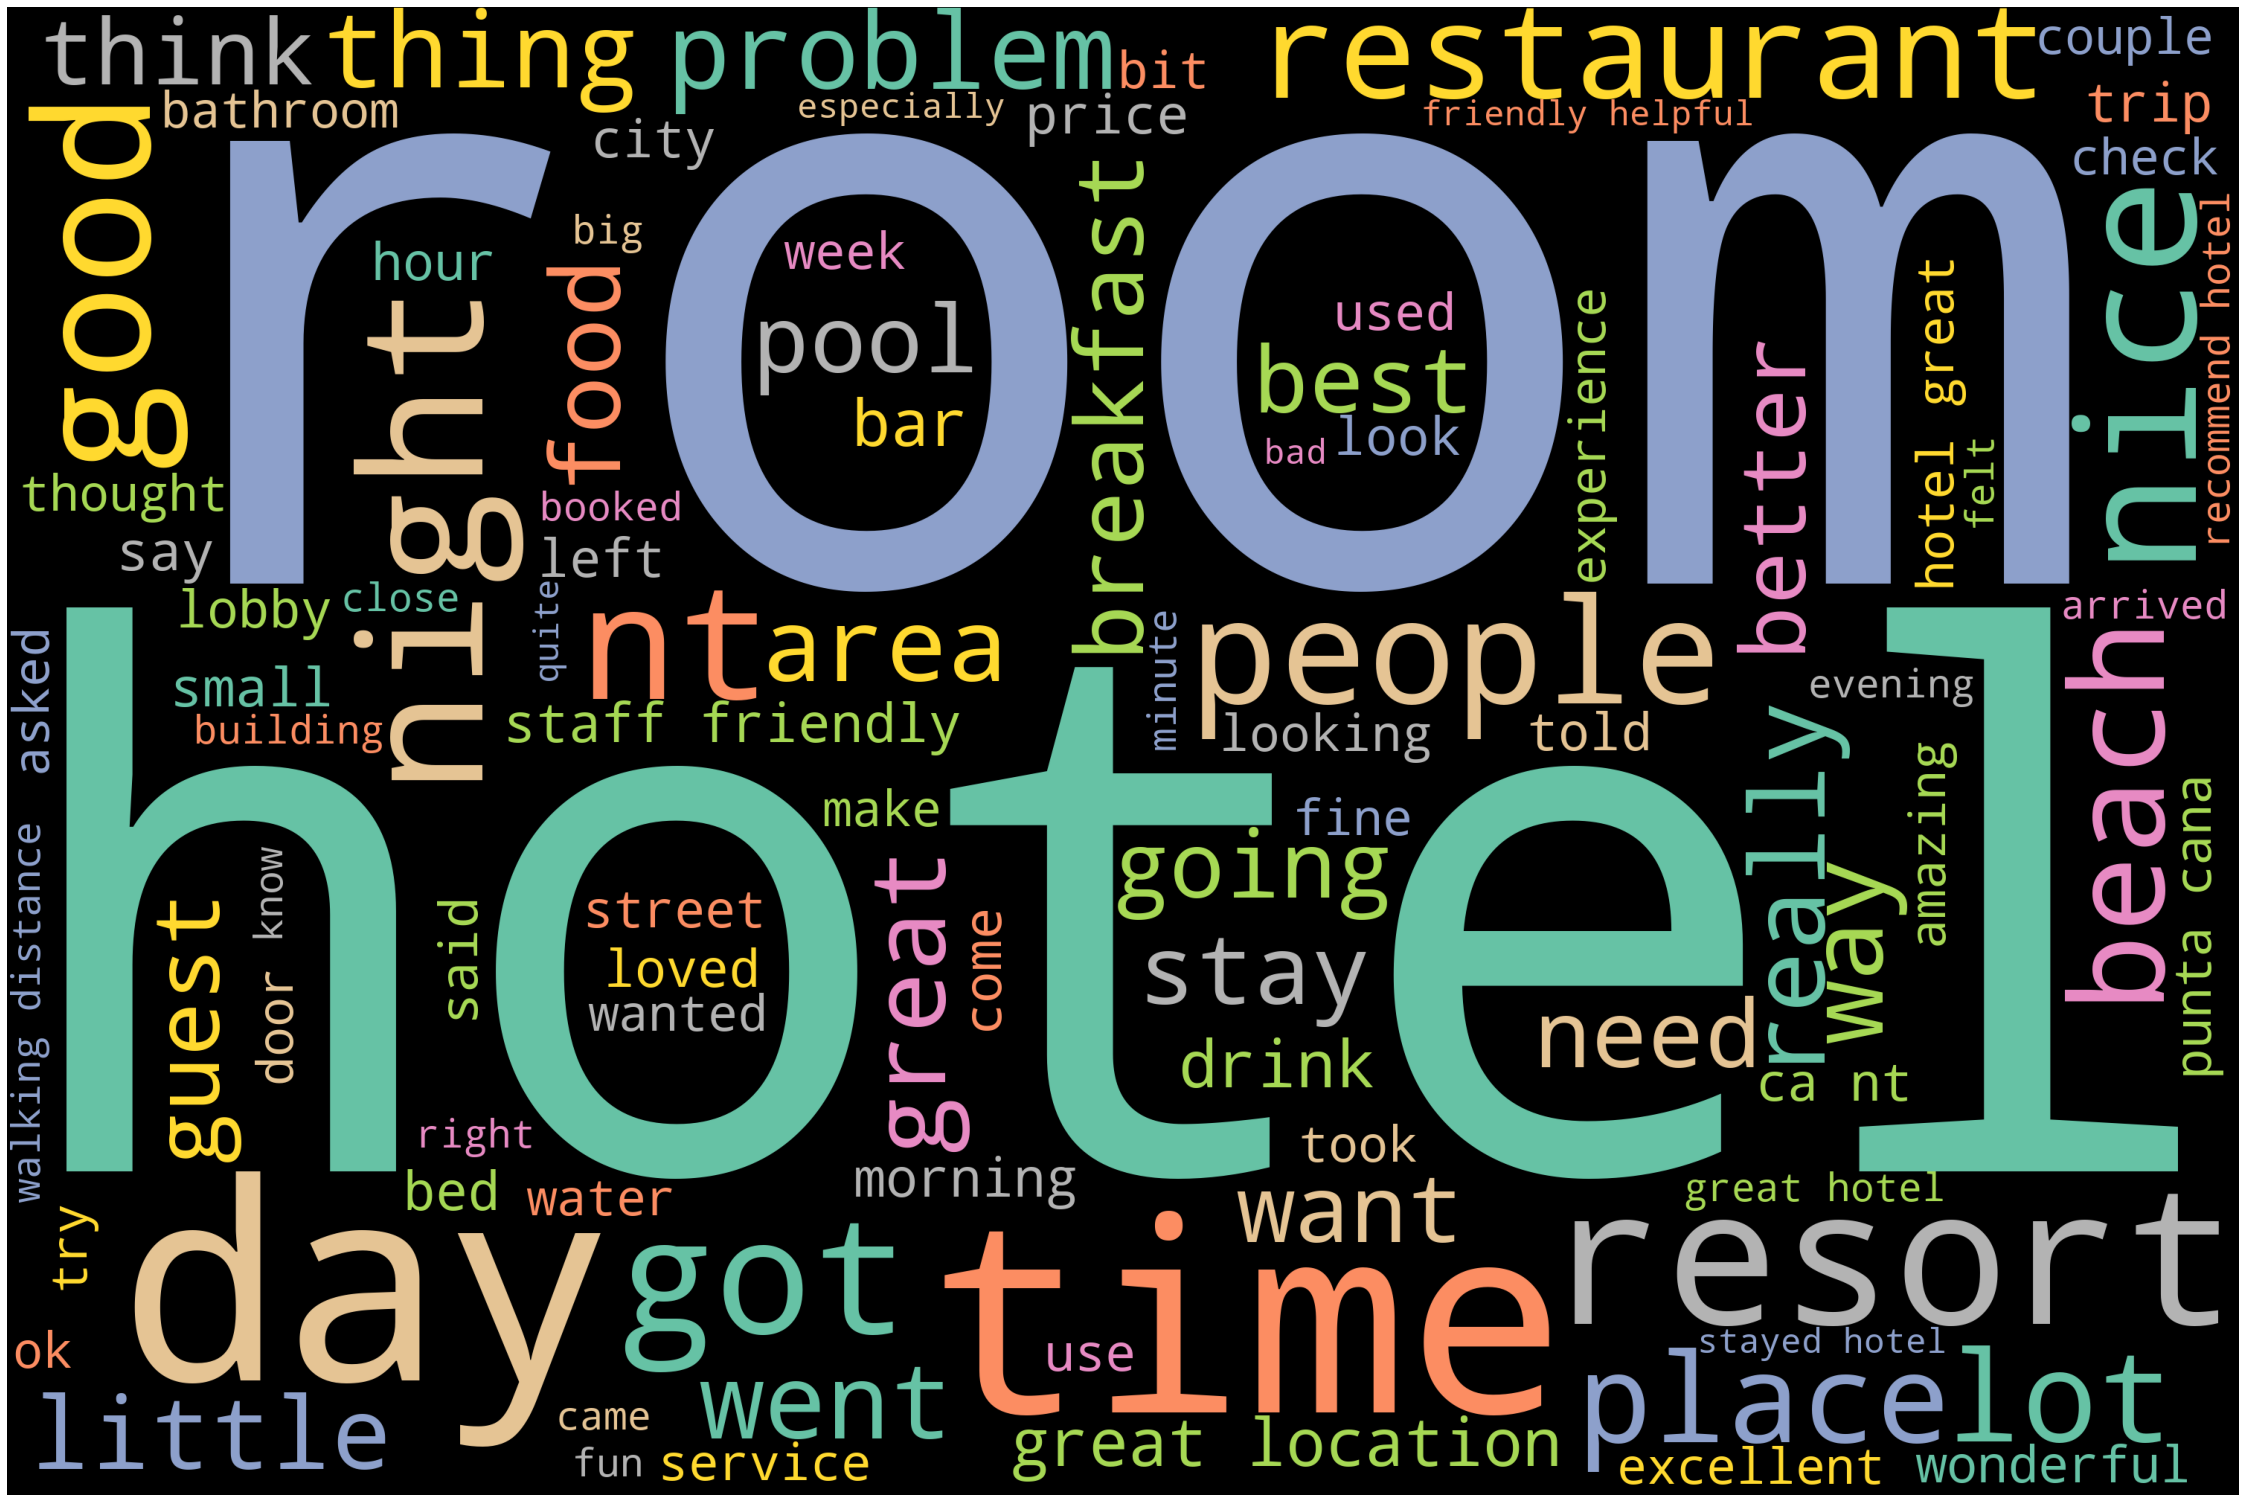

In [36]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(wordc)
# Plot
plot_cloud(wordcloud)

# stemming

In [38]:
from nltk.stem import PorterStemmer

In [39]:
st = PorterStemmer()
df['stemmed'] = df['stopwords_removed'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()])) # Stem every word.


In [40]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not  experience hotel monaco seattl...       3   
3  unique great stay wonderful time hotel monaco ...       5   
4  great stay great stay went seahawk game awesom...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                        expandedtext  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not experience hotel monaco seattle...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopw  \
0  [nice, hotel, expensive, parking, got, good, d...     80   
1  [ok, nothing, special, charge, diamond, member...    228   
2  [nice, rooms, not, experience, hotel, monaco, ...    195   
3  [unique, great, stay, wonderful, time, hotel, ...     85   
4  [great, stay, great, stay, went, seahawk, game...    178   

                                   stopwords_removed  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms experience hotel monaco seattle goo...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             stemmed  
0  nice hotel expens park got good deal stay hote...  
1  ok noth special charg diamond member hilton de...  
2  nice room experi hotel monaco seattl good hote...  
3  uniqu great stay wonder time hotel monaco loca...  
4  great stay great stay went seahawk game awesom...

# lemmatization

In [42]:
from textblob import Word

In [43]:
df['lemma'] =df['stemmed'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [44]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not  experience hotel monaco seattl...       3   
3  unique great stay wonderful time hotel monaco ...       5   
4  great stay great stay went seahawk game awesom...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                        expandedtext  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not experience hotel monaco seattle...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopw  \
0  [nice, hotel, expensive, parking, got, good, d...     80   
1  [ok, nothing, special, charge, diamond, member...    228   
2  [nice, rooms, not, experience, hotel, monaco, ...    195   
3  [unique, great, stay, wonderful, time, hotel, ...     85   
4  [great, stay, great, stay, went, seahawk, game...    178   

                                   stopwords_removed  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms experience hotel monaco seattle goo...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             stemmed  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room experi hotel monaco seattl good hote...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                               lemma  
0  nice hotel expens park got good deal stay hote...  
1  ok noth special charg diamond member hilton de...  
2  nice room experi hotel monaco seattl good hote...  
3  uniqu great stay wonder time hotel monaco loca...  
4  great stay great stay went seahawk game awesom...

In [45]:
df['lemma']

0        nice hotel expens park got good deal stay hote...
1        ok noth special charg diamond member hilton de...
2        nice room experi hotel monaco seattl good hote...
3        uniqu great stay wonder time hotel monaco loca...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret time stay charm star ca nt be...
20487    great locat price view hotel great quick place...
20488    ok look nice modern outsid desk staff nt parti...
20489    hotel theft ruin vacat hotel open sept guest w...
20490    peopl talk ca nt believ excel rate hotel nt ye...
Name: lemma, Length: 20491, dtype: object

In [257]:
# clean some unwanted words

In [47]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
sw_nltk = stopwords.words('english')

In [49]:
from collections import Counter
p = Counter(" ".join(df['lemma']).split()).most_common(20)
result = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(result)

         Word  Frequency
0       hotel      52894
1        room      46345
2        stay      28246
3       great      21148
4          nt      19005
5        good      17120
6       staff      16274
7       night      14064
8       locat      13634
9        nice      13064
10        day      12940
11       time      12673
12      clean      10746
13     servic      10667
14       walk      10202
15    restaur      10112
16      beach      10044
17      place       9705
18  breakfast       9664
19       like       9494


In [50]:
sw_nltk.extend(['howev','ever','particularli','includ','end','put','stop','make','find','hotel','trafalgar','excel','would','realli','also','week','deliveriesrefus','lowandbeholdtwo','back','strand','palac','london','go','come'])

In [51]:
df['cleaned'] = df['lemma'].str.split().map(lambda x: [word for word in x if word not in sw_nltk])

In [52]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not  experience hotel monaco seattl...       3   
3  unique great stay wonderful time hotel monaco ...       5   
4  great stay great stay went seahawk game awesom...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                        expandedtext  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not experience hotel monaco seattle...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopw  \
0  [nice, hotel, expensive, parking, got, good, d...     80   
1  [ok, nothing, special, charge, diamond, member...    228   
2  [nice, rooms, not, experience, hotel, monaco, ...    195   
3  [unique, great, stay, wonderful, time, hotel, ...     85   
4  [great, stay, great, stay, went, seahawk, game...    178   

                                   stopwords_removed  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms experience hotel monaco seattle goo...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             stemmed  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room experi hotel monaco seattl good hote...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                               lemma  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room experi hotel monaco seattl good hote...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                             cleaned  
0  [nice, expens, park, got, good, deal, stay, an...  
1  [ok, noth, special, charg, diamond, member, hi...  
2  [nice, room, experi, monaco, seattl, good, nt,...  
3  [uniqu, great, stay, wonder, time, monaco, loc...  
4  [great, stay, great, stay, went, seahawk, game...

In [53]:
df['cleaned']

0        [nice, expens, park, got, good, deal, stay, an...
1        [ok, noth, special, charg, diamond, member, hi...
2        [nice, room, experi, monaco, seattl, good, nt,...
3        [uniqu, great, stay, wonder, time, monaco, loc...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, time, stay, charm, star, ...
20487    [great, locat, price, view, great, quick, plac...
20488    [ok, look, nice, modern, outsid, desk, staff, ...
20489    [theft, ruin, vacat, open, sept, guest, happi,...
20490    [peopl, talk, ca, nt, believ, rate, nt, ye, pa...
Name: cleaned, Length: 20491, dtype: object

In [54]:
df['cleaned_1']=df['cleaned'].apply(' '.join)

In [55]:
df['cleaned_1']

0        nice expens park got good deal stay anniversar...
1        ok noth special charg diamond member hilton de...
2        nice room experi monaco seattl good nt levelpo...
3        uniqu great stay wonder time monaco locat shor...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret time stay charm star ca nt be...
20487    great locat price view great quick place sight...
20488    ok look nice modern outsid desk staff nt frien...
20489    theft ruin vacat open sept guest happi stumbl ...
20490    peopl talk ca nt believ rate nt ye patricia ex...
Name: cleaned_1, Length: 20491, dtype: object

# Building a new wordcloud after removing unwanted words

In [57]:
#Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [58]:
text = ' '.join(df['cleaned_1'])

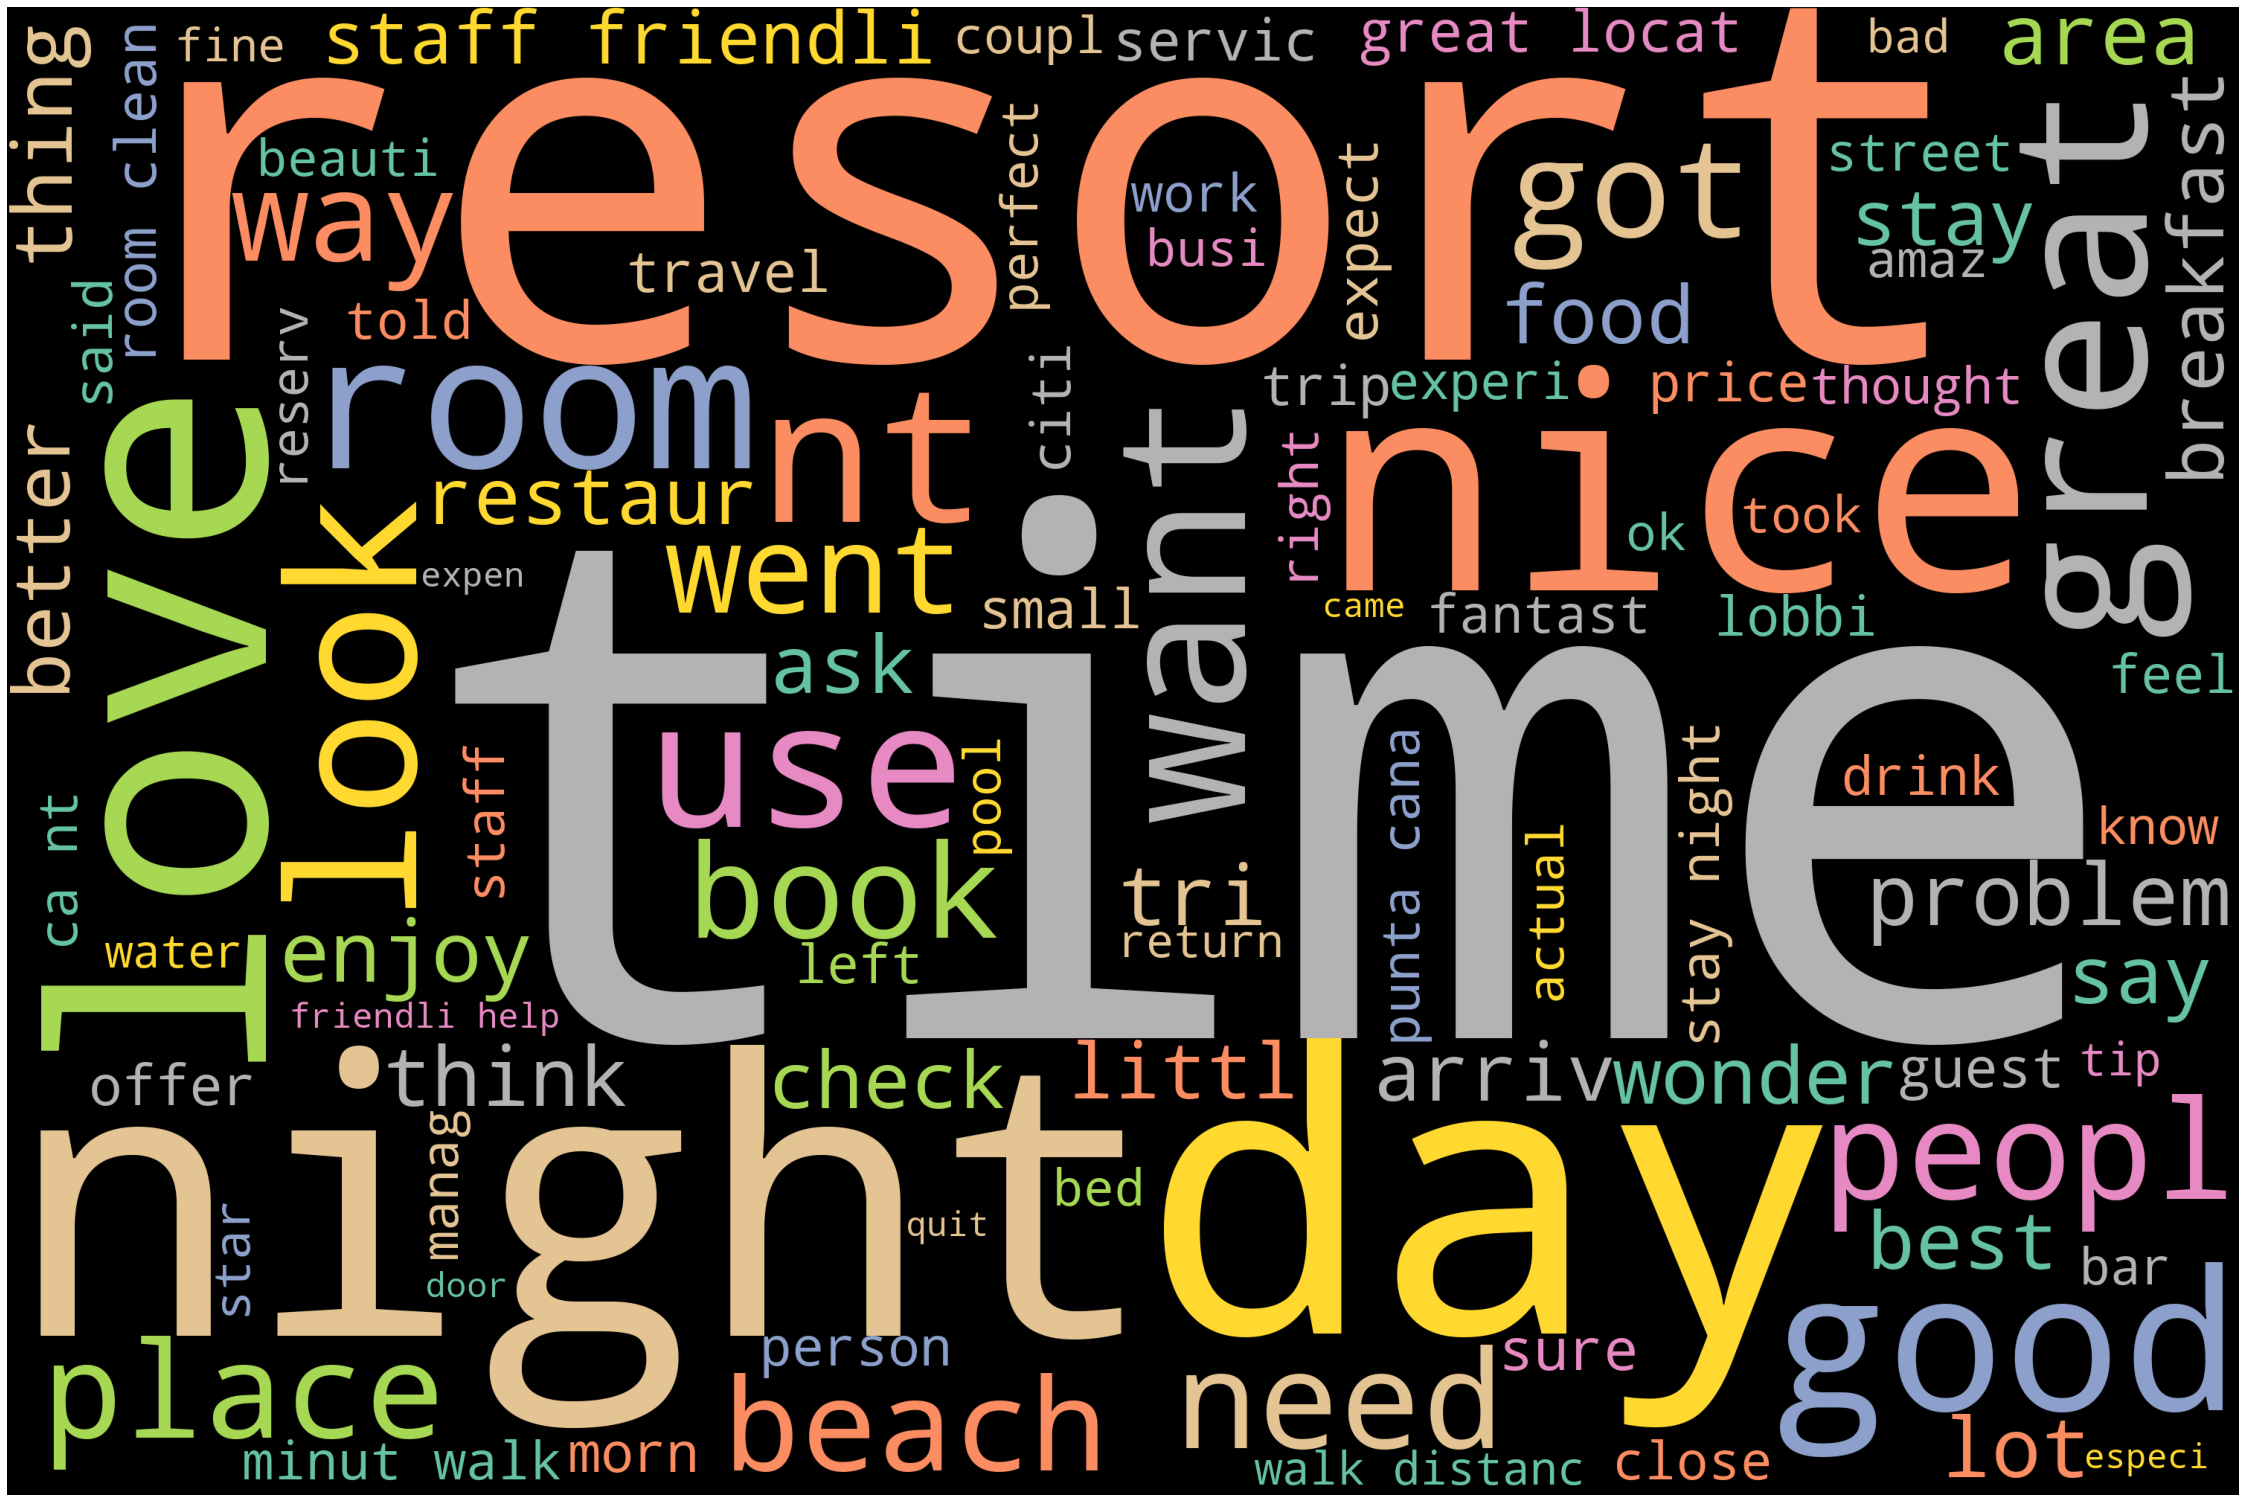

In [59]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

# top 20 words

In [61]:
reviews=np.array(df['cleaned_1'])
s=str(reviews)
token = word_tokenize(s)
print(token)

['[', "'nice", 'expens', 'park', 'got', 'good', 'deal', 'stay', 'anniversari', 'arriv', 'late', 'even', 'took', 'advic', 'previou', 'review', 'valet', 'park', 'check', 'quick', 'easi', 'littl', 'disappoint', 'nonexist', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfort', 'woke', 'stiff', 'neck', 'high', 'pillow', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morn', 'loud', 'bang', 'door', 'open', 'close', 'hear', 'peopl', 'talk', 'hallway', 'mayb', 'noisi', 'neighbor', 'aveda', 'bath', 'product', 'nice', 'goldfish', 'stay', 'nice', 'touch', 'taken', 'advantag', 'stay', 'longer', 'locat', 'great', 'walk', 'distanc', 'shop', 'overal', 'nice', 'experi', 'pay', 'park', "night'", "'ok", 'noth', 'special', 'charg', 'diamond', 'member', 'hilton', 'decid', 'chain', 'shot', 'anniversari', 'seattl', 'start', 'book', 'suit', 'paid', 'extra', 'websit', 'descript', 'suit', 'bedroom', 'bathroom', 'standard', 'room', 'took', 'print', 'reserv', 'desk', 'show', 'said', 'thing

In [62]:
from nltk.probability import FreqDist

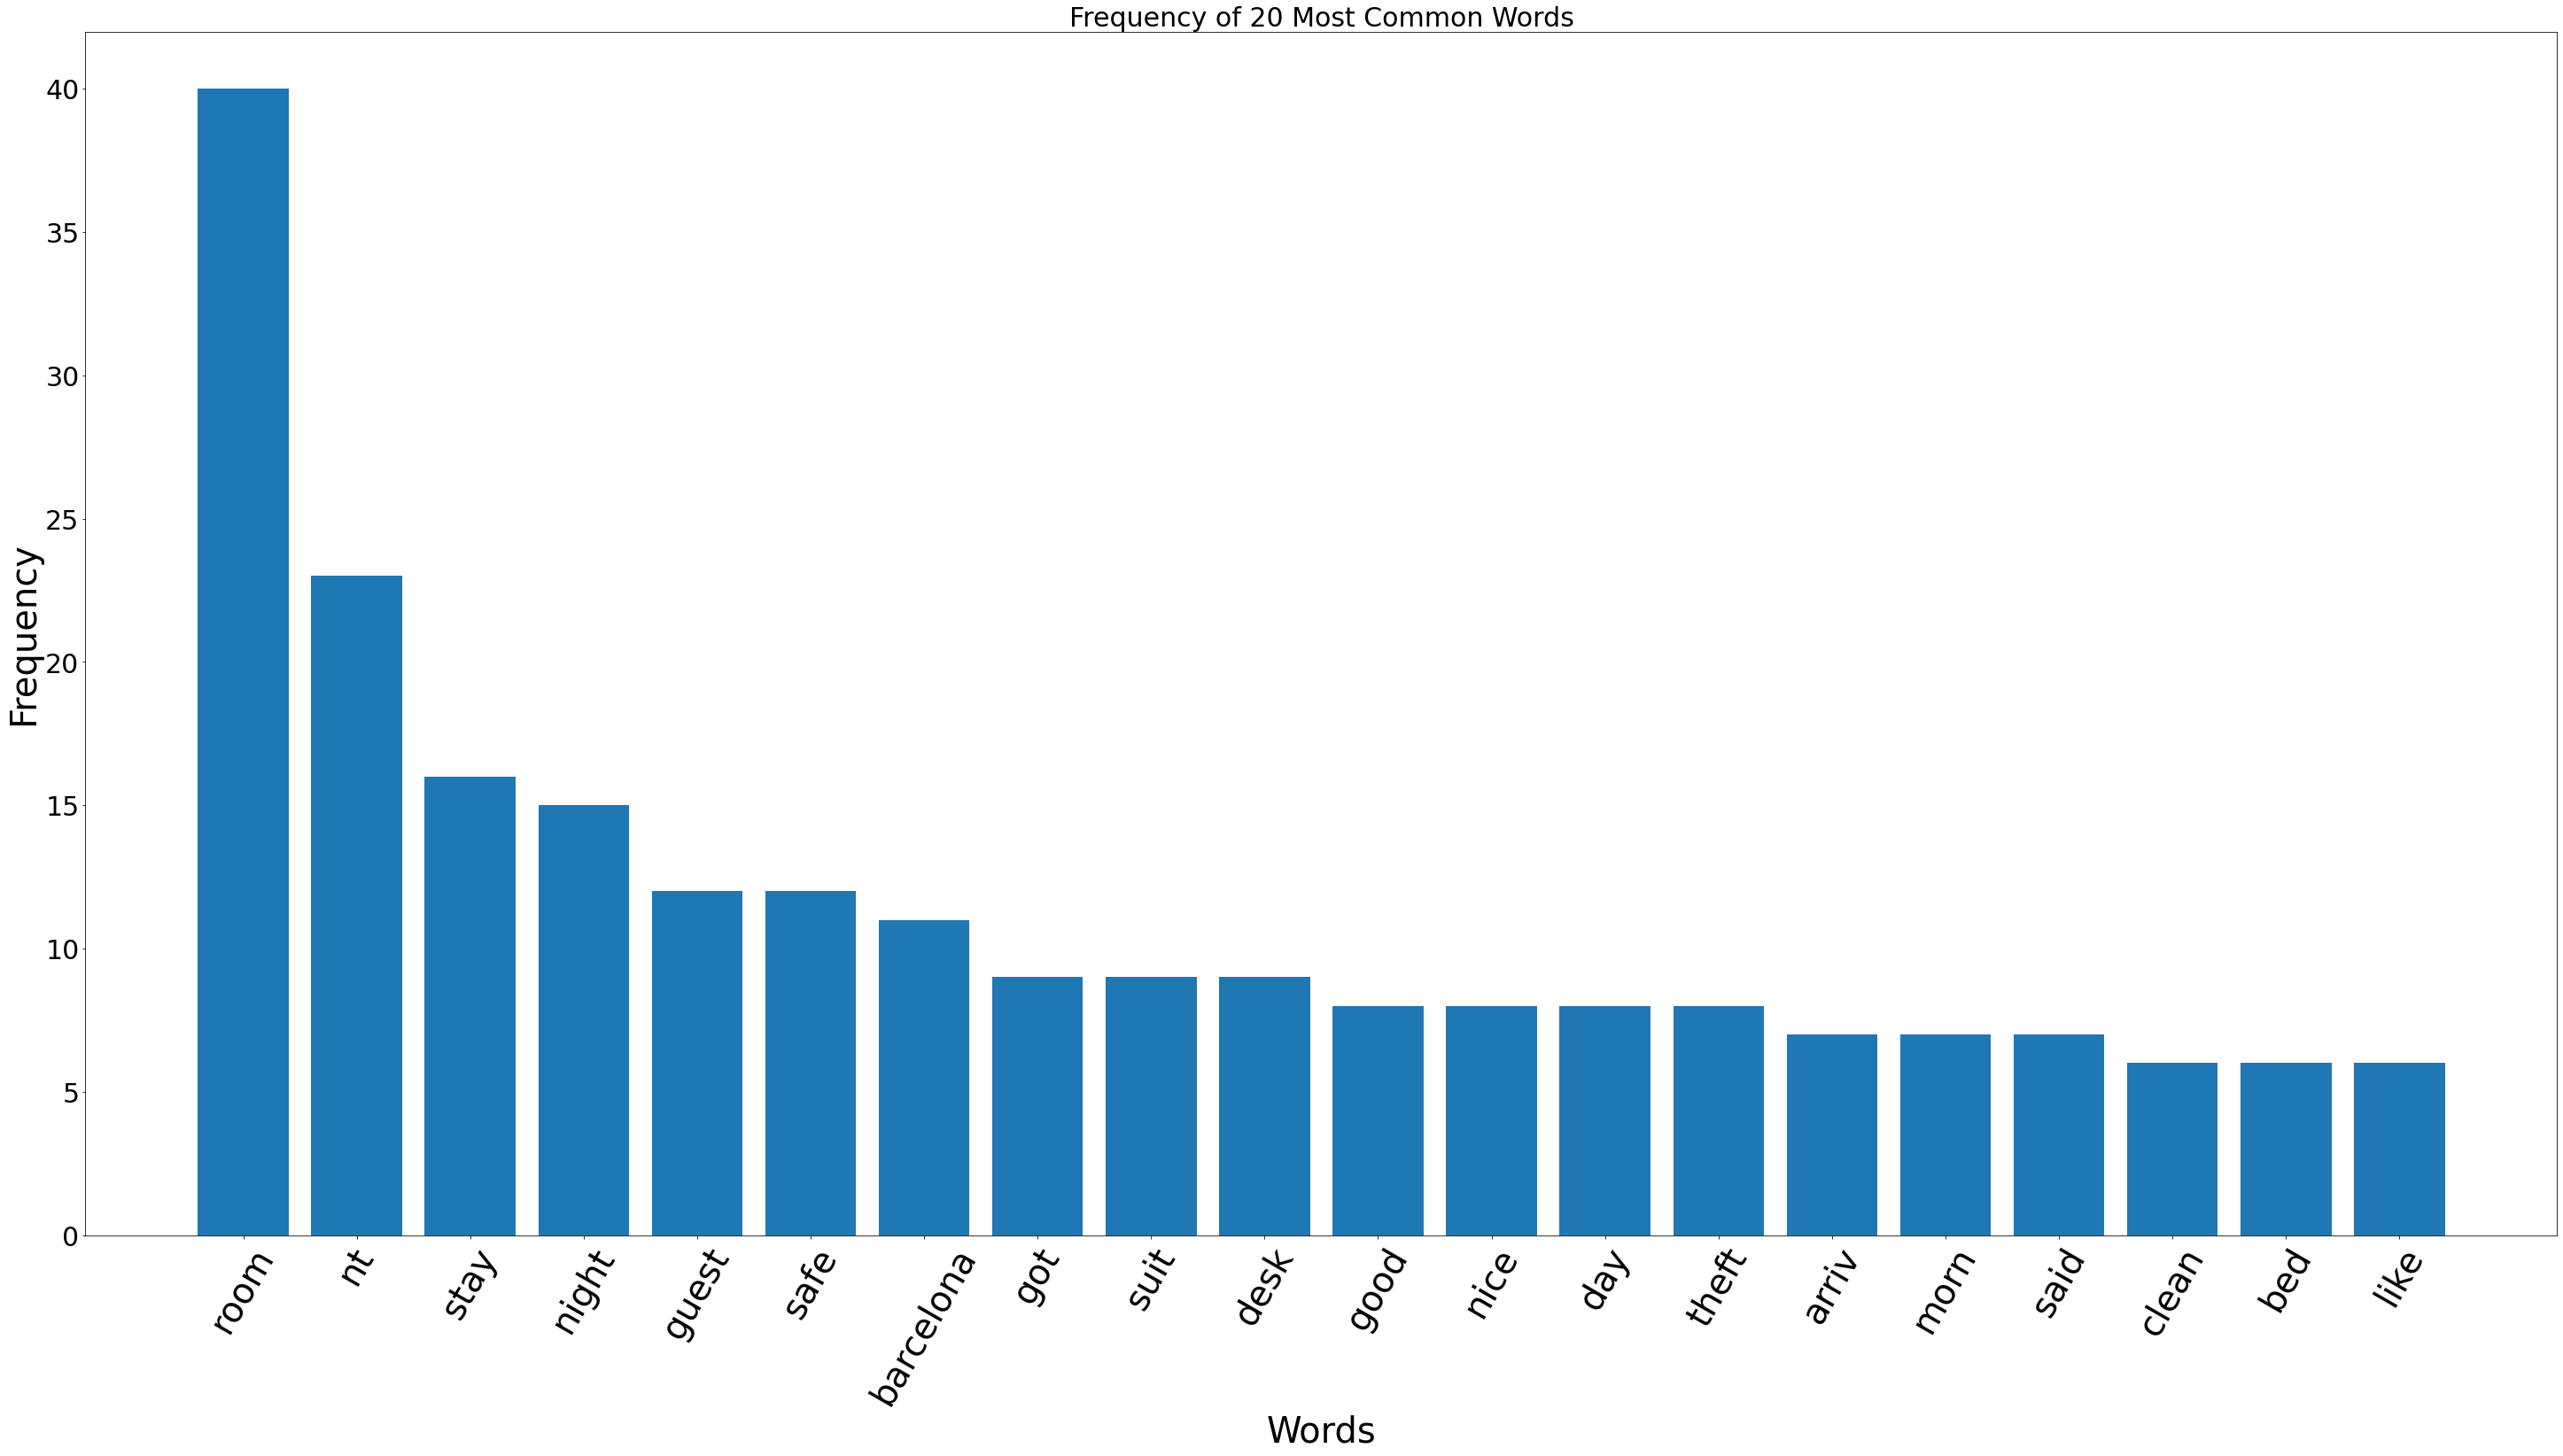

In [63]:
mostcommon = FreqDist(token).most_common(20)

x, y = zip(*mostcommon)

plt.figure(figsize=(50,25))
# plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=40)
plt.ylabel('Frequency', fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 20 Most Common Words', fontsize=30)
plt.show()

In [64]:
#bi gram

In [65]:
def top_2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [66]:
# top 20 Bi-gram words
from sklearn.feature_extraction.text import CountVectorizer
top2_words = top_2_words(df["cleaned_1"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(20)

Bi-gram  Freq
0     staff friendli  2203
1        great locat  2199
2         room clean  2074
3         stay night  1862
4              ca nt  1809
5         punta cana  1683
6         minut walk  1670
7       walk distanc  1433
8      friendli help  1400
9   highli recommend  1324
10       room servic  1294
11        place stay  1226
12        staff help  1180
13        room small  1077
14         room nice  1074
15       read review   991
16        room floor   910
17       locat great   902
18       great place   859
19          san juan   858

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

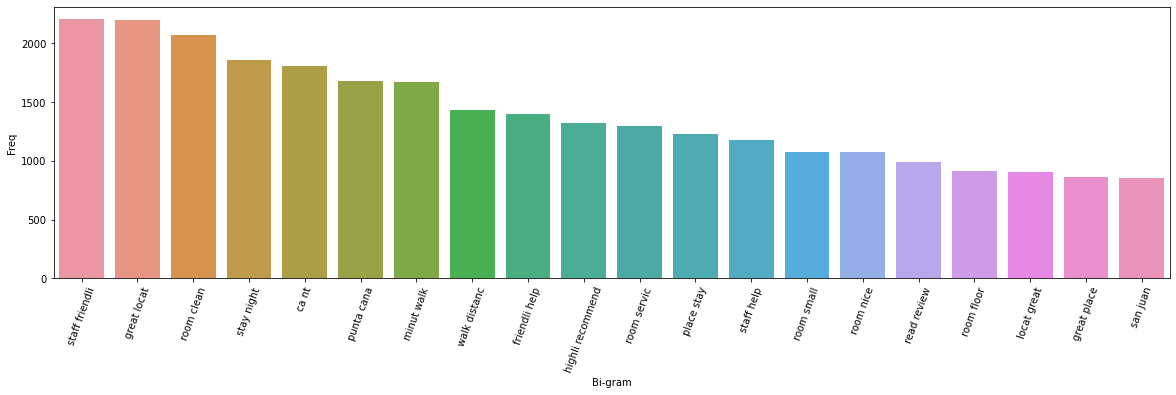

In [68]:
top2_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top2_bigram["Bi-gram"],y=top2_bigram["Freq"]);
plot.set_xticklabels(rotation=70,labels = top2_bigram["Bi-gram"]);

In [69]:
#tri gram

In [70]:
def top_3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [71]:
top3_words = top_3_words(df["cleaned_1"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head(20)

Tri-gram  Freq
0    staff friendli help   759
1           old san juan   354
2          king size bed   308
3       great place stay   281
4         flat screen tv   269
5             ca nt wait   241
6        good valu money   214
7        la cart restaur   199
8      easi walk distanc   190
9   free internet access   188
10            ca nt beat   184
11   staff help friendli   178
12        room good size   177
13             ca nt say   167
14     return night stay   164
15     great locat great   162
16    locat walk distanc   150
17       minut walk away   149
18    room clean comfort   146
19      great locat stay   141

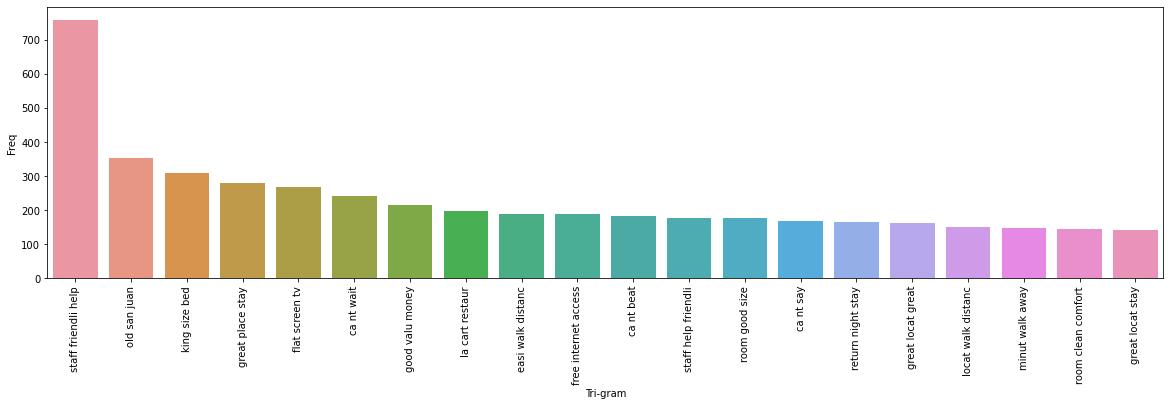

In [72]:
#import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

# polarity

In [74]:
from textblob import TextBlob

In [75]:
df['polarity'] = df['lemma'].apply(lambda x: TextBlob(x).sentiment.polarity )
df[['Review','polarity']].head()

Review  polarity
0  nice hotel expensive parking got good deal sta...  0.353265
1  ok nothing special charge diamond member hilto...  0.323800
2  nice rooms not  experience hotel monaco seattl...  0.294513
3  unique great stay wonderful time hotel monaco ...  0.455556
4  great stay great stay went seahawk game awesom...  0.424351

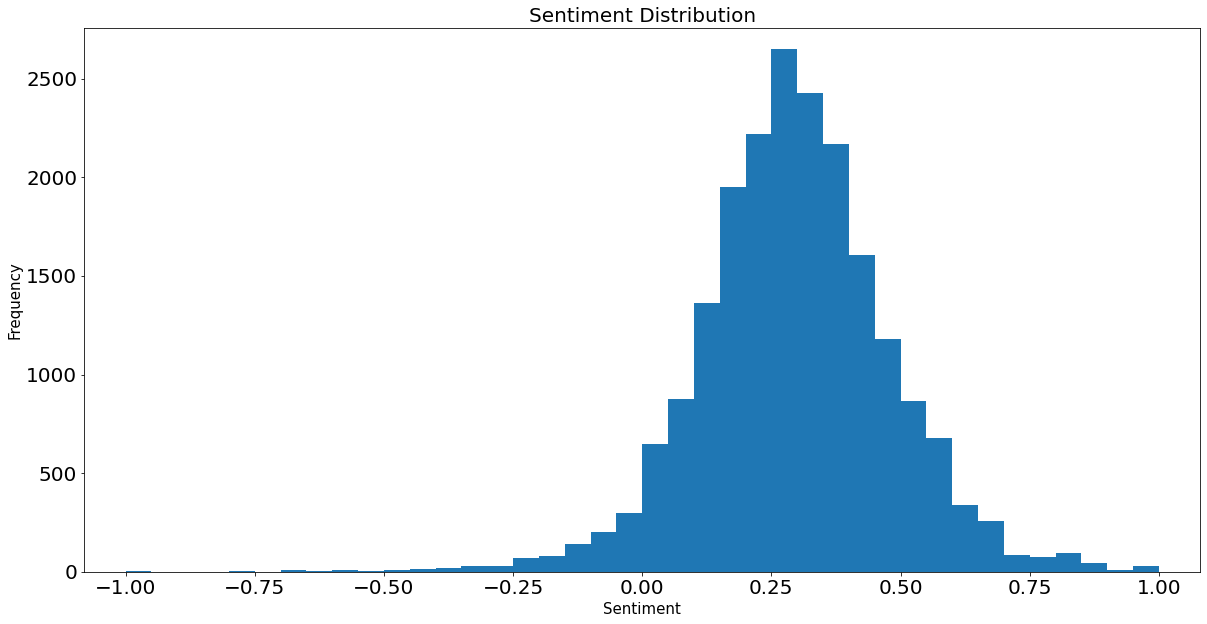

In [76]:
plt.figure(figsize=(20,10))
plt.margins(0.04)
plt.xlabel('Sentiment', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(df['polarity'], bins=40)
plt.title('Sentiment Distribution', fontsize=20)
plt.show()

In [77]:
#chk for single sentence
TextBlob("nice hotel expensive parking got good deal").sentiment

Sentiment(polarity=0.26666666666666666, subjectivity=0.7666666666666666)

# afinn lexicin

In [79]:
afinn= pd.read_csv('C:/Users/HP/Desktop/Afinn.csv', sep=',', encoding='latin-1')

In [80]:
afinn.shape

(2477, 2)

In [81]:
afinn.head()

word  value
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2

In [82]:
from afinn import Afinn

In [83]:
import spacy

In [84]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [85]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [86]:
df['sentiment_value'] = df['lemma'].apply(calculate_sentiment)

In [87]:
df[['Review','sentiment_value']]

Review  sentiment_value
0      nice hotel expensive parking got good deal sta...               24
1      ok nothing special charge diamond member hilto...               37
2      nice rooms not  experience hotel monaco seattl...               25
3      unique great stay wonderful time hotel monaco ...               27
4      great stay great stay went seahawk game awesom...               22
...                                                  ...              ...
20486  best kept secret  time staying charm not star ...               16
20487  great location price view hotel great quick pl...               17
20488  ok just looks nice modern outside desk staff n...                7
20489  hotel theft ruined vacation hotel opened sept ...              -13
20490  people talking ca nt believe excellent ratings...               10

[20491 rows x 2 columns]

In [88]:
df[df['sentiment_value']<=0]

Review  Rating  \
42     warwick bad good reviews warwick shocks staff ...       2   
44     austin powers decor familiar hotel seattlewher...       2   
65     hated inn terrible roomservice horrible staff ...       1   
76     stay clear internet reservation friday rang ho...       1   
88     worst hotel experience booked nonsmoking room ...       1   
...                                                  ...     ...   
20421  worst sleep hip tooooo hip nite club building ...       1   
20457  not ready kinks felt taken advantage just stay...       2   
20465  not stay hotel brought group february worst ho...       1   
20467  returning la concha nightmare surprising hotel...       1   
20489  hotel theft ruined vacation hotel opened sept ...       1   

                                             no_contract  \
42     [warwick, bad, good, reviews, warwick, shocks,...   
44     [austin, powers, decor, familiar, hotel, seatt...   
65     [hated, inn, terrible, roomservice, horrible, ...   
76     [stay, clear, internet, reservation, friday, r...   
88     [worst, hotel, experience, booked, nonsmoking,...   
...                                                  ...   
20421  [worst, sleep, hip, tooooo, hip, nite, club, b...   
20457  [not, ready, kinks, felt, taken, advantage, ju...   
20465  [not, stay, hotel, brought, group, february, w...   
20467  [returning, la, concha, nightmare, surprising,...   
20489  [hotel, theft, ruined, vacation, hotel, opened...   

                                            expandedtext  \
42     warwick bad good reviews warwick shocks staff ...   
44     austin powers decor familiar hotel seattlewher...   
65     hated inn terrible roomservice horrible staff ...   
76     stay clear internet reservation friday rang ho...   
88     worst hotel experience booked nonsmoking room ...   
...                                                  ...   
20421  worst sleep hip tooooo hip nite club building ...   
20457  not ready kinks felt taken advantage just stay...   
20465  not stay hotel brought group february worst ho...   
20467  returning la concha nightmare surprising hotel...   
20489  hotel theft ruined vacation hotel opened sept ...   

                                               tokenized  \
42     [warwick, bad, good, reviews, warwick, shocks,...   
44     [austin, powers, decor, familiar, hotel, seatt...   
65     [hated, inn, terrible, roomservice, horrible, ...   
76     [stay, clear, internet, reservation, friday, r...   
88     [worst, hotel, experience, booked, nonsmoking,...   
...                                                  ...   
20421  [worst, sleep, hip, tooooo, hip, nite, club, b...   
20457  [not, ready, kinks, felt, taken, advantage, ju...   
20465  [not, stay, hotel, brought, group, february, w...   
20467  [returning, la, concha, nightmare, surprising,...   
20489  [hotel, theft, ruined, vacation, hotel, opened...   

                                                   lower  stopw  \
42     [warwick, bad, good, reviews, warwick, shocks,...     20   
44     [austin, powers, decor, familiar, hotel, seatt...     35   
65     [hated, inn, terrible, roomservice, horrible, ...     16   
76     [stay, clear, internet, reservation, friday, r...     55   
88     [worst, hotel, experience, booked, nonsmoking,...    138   
...                                                  ...    ...   
20421  [worst, sleep, hip, tooooo, hip, nite, club, b...     46   
20457  [not, ready, kinks, felt, taken, advantage, ju...    107   
20465  [not, stay, hotel, brought, group, february, w...     38   
20467  [returning, la, concha, nightmare, surprising,...     65   
20489  [hotel, theft, ruined, vacation, hotel, opened...    738   

                                       stopwords_removed  \
42     warwick bad good reviews warwick shocks staff ...   
44     austin powers decor familiar hotel seattlewher...   
65     hated inn terrible roomservice horrible staff ...   
76     stay clear interne

In [89]:
df[df['sentiment_value']>=20]

Review  Rating  \
0      nice hotel expensive parking got good deal sta...       4   
1      ok nothing special charge diamond member hilto...       2   
2      nice rooms not  experience hotel monaco seattl...       3   
3      unique great stay wonderful time hotel monaco ...       5   
4      great stay great stay went seahawk game awesom...       5   
...                                                  ...     ...   
20450  best destress resort earth  weeks destress tok...       5   
20462  chic hotel great beaches excellent service gre...       4   
20464  loved la concha stayed  nights  days la concha...       5   
20468  absolutely wonderful st regis spg member excit...       5   
20482  great choice wife chose best western quite bit...       5   

                                             no_contract  \
0      [nice, hotel, expensive, parking, got, good, d...   
1      [ok, nothing, special, charge, diamond, member...   
2      [nice, rooms, not, experience, hotel, monaco, ...   
3      [unique, great, stay, wonderful, time, hotel, ...   
4      [great, stay, great, stay, went, seahawk, game...   
...                                                  ...   
20450  [best, destress, resort, earth, weeks, destres...   
20462  [chic, hotel, great, beaches, excellent, servi...   
20464  [loved, la, concha, stayed, nights, days, la, ...   
20468  [absolutely, wonderful, st, regis, spg, member...   
20482  [great, choice, wife, chose, best, western, qu...   

                                            expandedtext  \
0      nice hotel expensive parking got good deal sta...   
1      ok nothing special charge diamond member hilto...   
2      nice rooms not experience hotel monaco seattle...   
3      unique great stay wonderful time hotel monaco ...   
4      great stay great stay went seahawk game awesom...   
...                                                  ...   
20450  best destress resort earth weeks destress toky...   
20462  chic hotel great beaches excellent service gre...   
20464  loved la concha stayed nights days la concha a...   
20468  absolutely wonderful st regis spg member excit...   
20482  great choice wife chose best western quite bit...   

                                               tokenized  \
0      [nice, hotel, expensive, parking, got, good, d...   
1      [ok, nothing, special, charge, diamond, member...   
2      [nice, rooms, not, experience, hotel, monaco, ...   
3      [unique, great, stay, wonderful, time, hotel, ...   
4      [great, stay, great, stay, went, seahawk, game...   
...                                                  ...   
20450  [best, destress, resort, earth, weeks, destres...   
20462  [chic, hotel, great, beaches, excellent, servi...   
20464  [loved, la, concha, stayed, nights, days, la, ...   
20468  [absolutely, wonderful, st, regis, spg, member...   
20482  [great, choice, wife, chose, best, western, qu...   

                                                   lower  stopw  \
0      [nice, hotel, expensive, parking, got, good, d...     80   
1      [ok, nothing, special, charge, diamond, member...    228   
2      [nice, rooms, not, experience, hotel, monaco, ...    195   
3      [unique, great, stay, wonderful, time, hotel, ...     85   
4      [great, stay, great, stay, went, seahawk, game...    178   
...                                                  ...    ...   
20450  [best, destress, resort, earth, weeks, destres...    348   
20462  [chic, hotel, great, beaches, excellent, servi...     99   
20464  [loved, la, concha, stayed, nights, days, la, ...    103   
20468  [absolutely, wonderful, st, regis, spg, member...    151   
20482  [great, choice, wife, chose, best, western, qu...    104   

                                       stopwords_removed  \
0      nice hotel expensive parking got good deal sta...   
1      ok nothing special charge diamond member hilto...   
2      nice rooms experience hotel monaco seattle goo...   
3      unique great stay 

In [90]:
df['sentiment'] = df['sentiment_value'].apply(lambda x : 'Positive' if x > 0 else ('Negative' if x<0 else 'Neutral'))

In [91]:
df['sentiment']

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
20486    Positive
20487    Positive
20488    Positive
20489    Negative
20490    Positive
Name: sentiment, Length: 20491, dtype: object

In [92]:
Neutral_senti=df[df['sentiment_value']==0]

In [93]:
Positive_senti=df[df['sentiment_value']>0]

In [94]:
Negative_senti=df[df['sentiment_value']<0]

In [95]:
Neutral_senti

Review  Rating  \
118    luxury luxury having stayed suite elses dime s...       4   
160    cramped noisy overrated husband just stayed ho...       1   
225    great seattle location great downtown hotel pa...       5   
231    worse stay hotel no help concierge no idea sit...       1   
259    watch baitandswitch room rates rooms acceptabl...       2   
...                                                  ...     ...   
20262  fantastic vaule spent  nights hotel end holida...       5   
20312  better view st regis stayed night prior night ...       5   
20405  location location location stayed deluxe room ...       4   
20457  not ready kinks felt taken advantage just stay...       2   
20467  returning la concha nightmare surprising hotel...       1   

                                             no_contract  \
118    [luxury, luxury, having, stayed, suite, elses,...   
160    [cramped, noisy, overrated, husband, just, sta...   
225    [great, seattle, location, great, downtown, ho...   
231    [worse, stay, hotel, no, help, concierge, no, ...   
259    [watch, baitandswitch, room, rates, rooms, acc...   
...                                                  ...   
20262  [fantastic, vaule, spent, nights, hotel, end, ...   
20312  [better, view, st, regis, stayed, night, prior...   
20405  [location, location, location, stayed, deluxe,...   
20457  [not, ready, kinks, felt, taken, advantage, ju...   
20467  [returning, la, concha, nightmare, surprising,...   

                                            expandedtext  \
118    luxury luxury having stayed suite elses dime s...   
160    cramped noisy overrated husband just stayed ho...   
225    great seattle location great downtown hotel pa...   
231    worse stay hotel no help concierge no idea sit...   
259    watch baitandswitch room rates rooms acceptabl...   
...                                                  ...   
20262  fantastic vaule spent nights hotel end holiday...   
20312  better view st regis stayed night prior night ...   
20405  location location location stayed deluxe room ...   
20457  not ready kinks felt taken advantage just stay...   
20467  returning la concha nightmare surprising hotel...   

                                               tokenized  \
118    [luxury, luxury, having, stayed, suite, elses,...   
160    [cramped, noisy, overrated, husband, just, sta...   
225    [great, seattle, location, great, downtown, ho...   
231    [worse, stay, hotel, no, help, concierge, no, ...   
259    [watch, baitandswitch, room, rates, rooms, acc...   
...                                                  ...   
20262  [fantastic, vaule, spent, nights, hotel, end, ...   
20312  [better, view, st, regis, stayed, night, prior...   
20405  [location, location, location, stayed, deluxe,...   
20457  [not, ready, kinks, felt, taken, advantage, ju...   
20467  [returning, la, concha, nightmare, surprising,...   

                                                   lower  stopw  \
118    [luxury, luxury, having, stayed, suite, elses,...     24   
160    [cramped, noisy, overrated, husband, just, sta...     47   
225    [great, seattle, location, great, downtown, ho...     33   
231    [worse, stay, hotel, no, help, concierge, no, ...     32   
259    [watch, baitandswitch, room, rates, rooms, acc...     90   
...                                                  ...    ...   
20262  [fantastic, vaule, spent, nights, hotel, end, ...     24   
20312  [better, view, st, regis, stayed, night, prior...     37   
20405  [location, location, location, stayed, deluxe,...     51   
20457  [not, ready, kinks, felt, taken, advantage, ju...    107   
20467  [returning, la, concha, nightmare, surprising,...     65   

                                       stopwords_removed  \
118    luxury luxury stayed suite elses dime suite ki...   
160    cramped noisy overrated husband stayed hotel m...   
225    great seattle location great downtown hotel pa...   
231    worse stay hotel h

In [96]:
#wordcloud for +

In [97]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [98]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [99]:
text = ' '.join(Positive_senti['cleaned_1'])

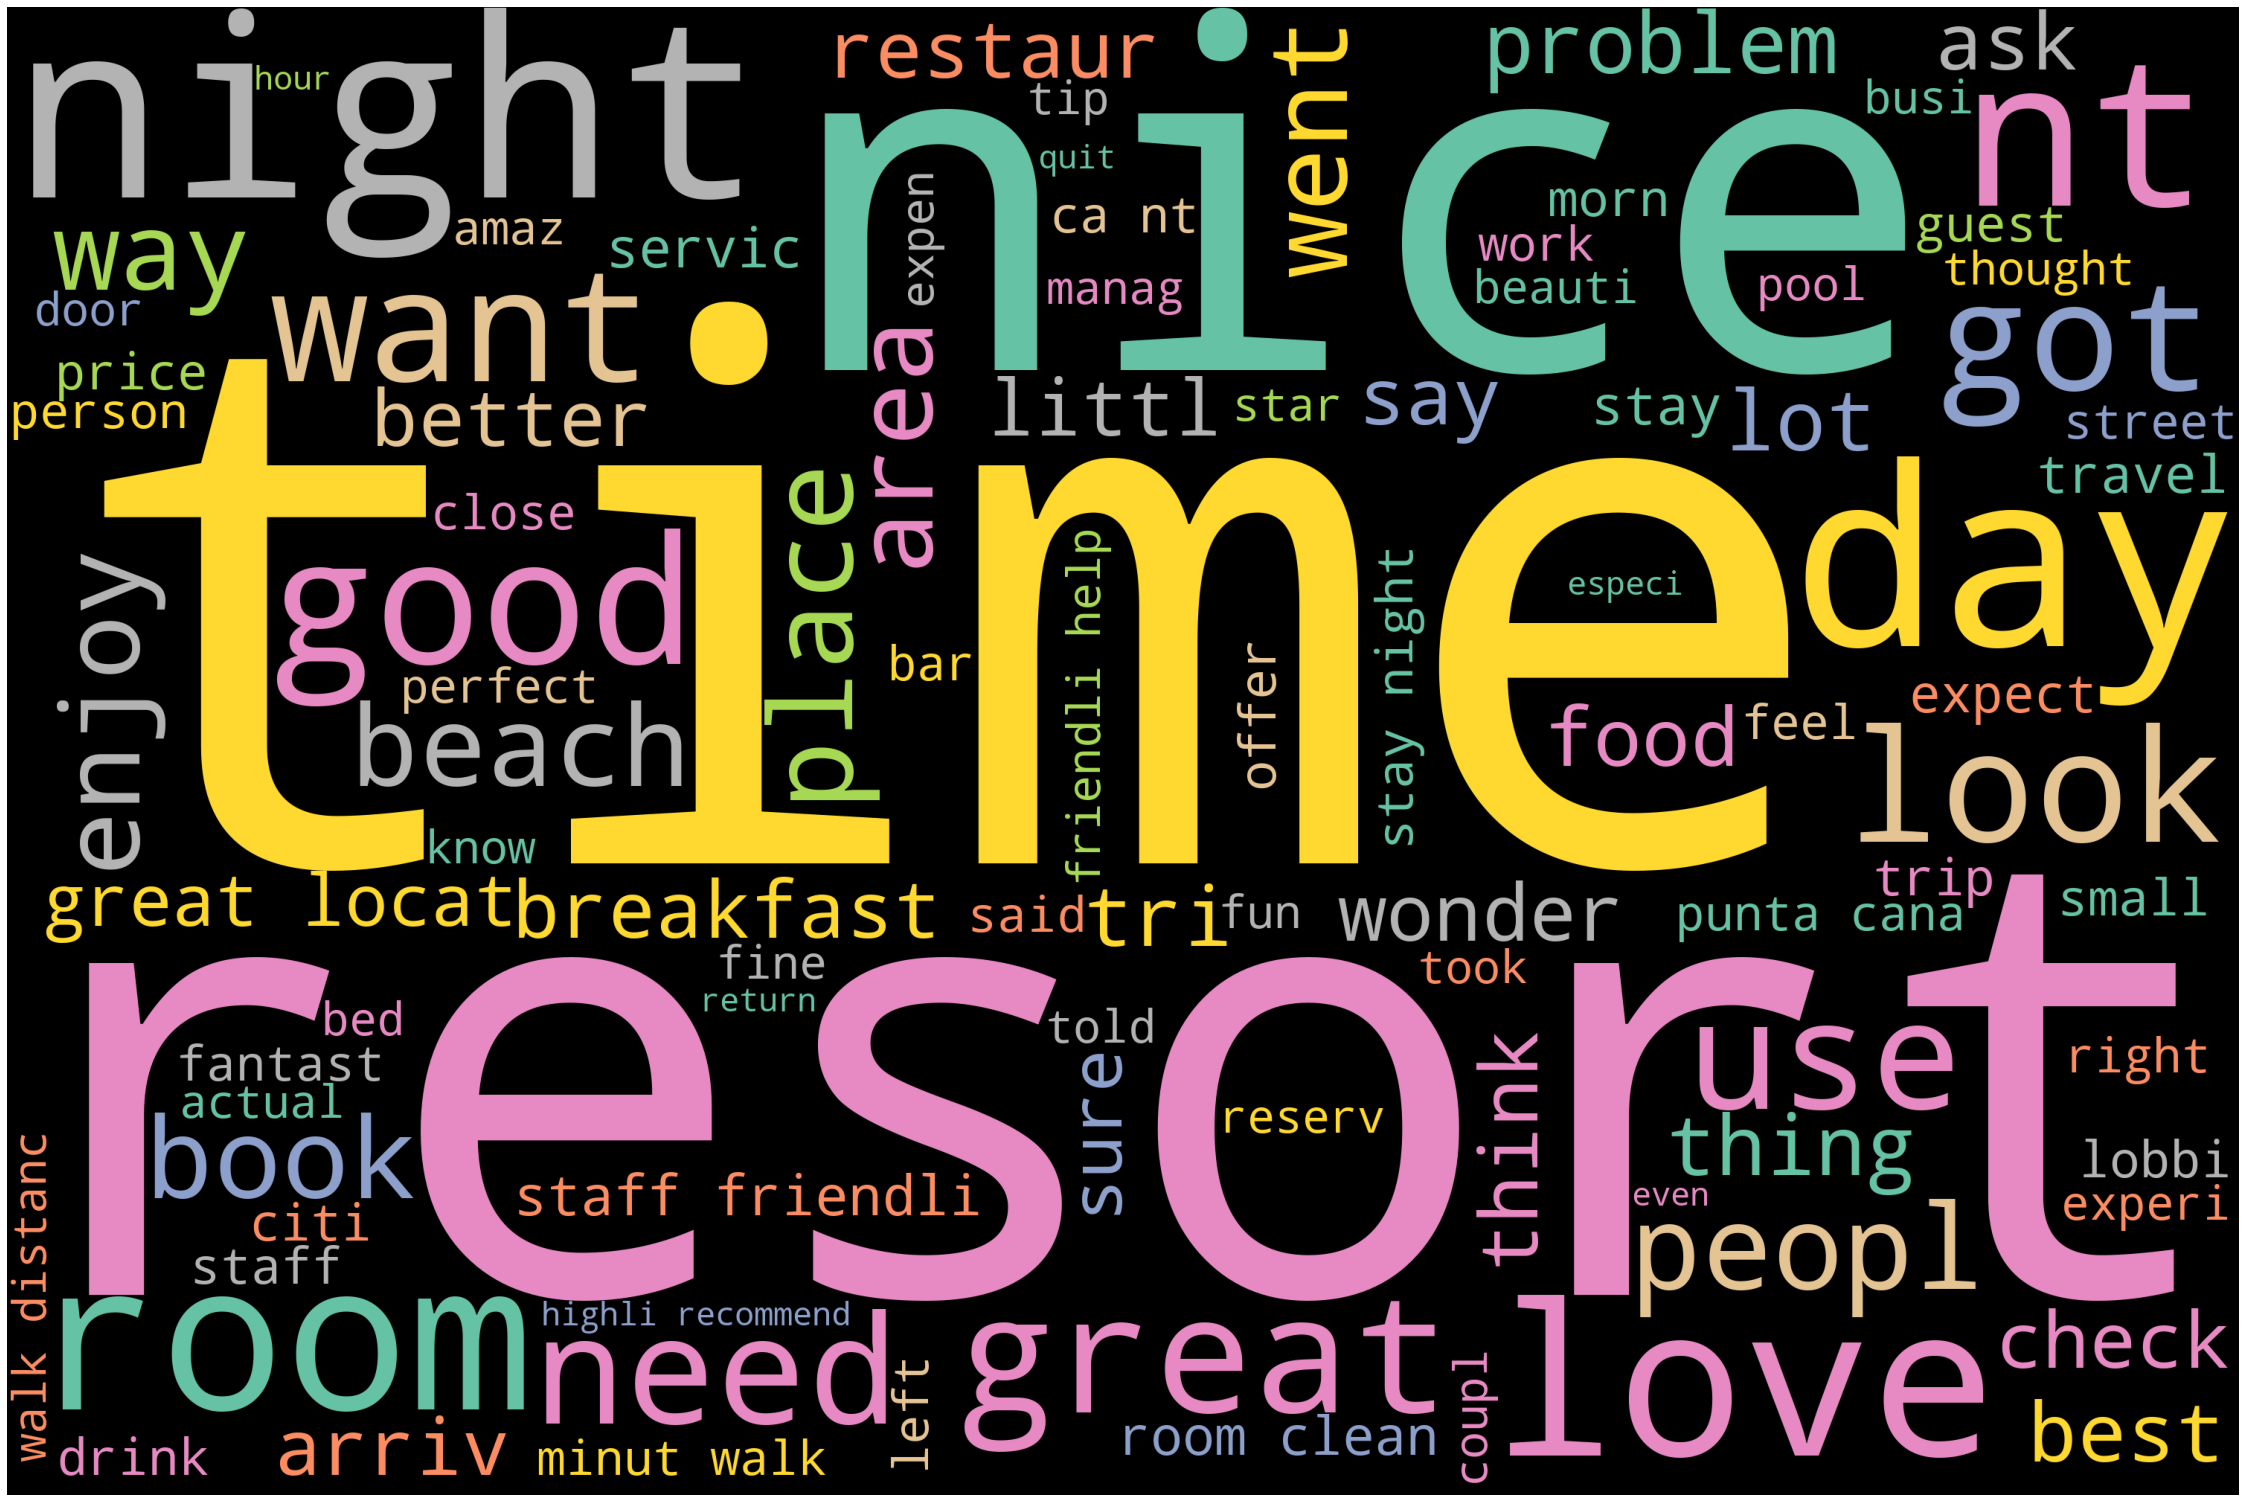

In [100]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [101]:
# Wordcloud for Neutral reviews

In [102]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [103]:
text = ' '.join(Neutral_senti['cleaned_1'])

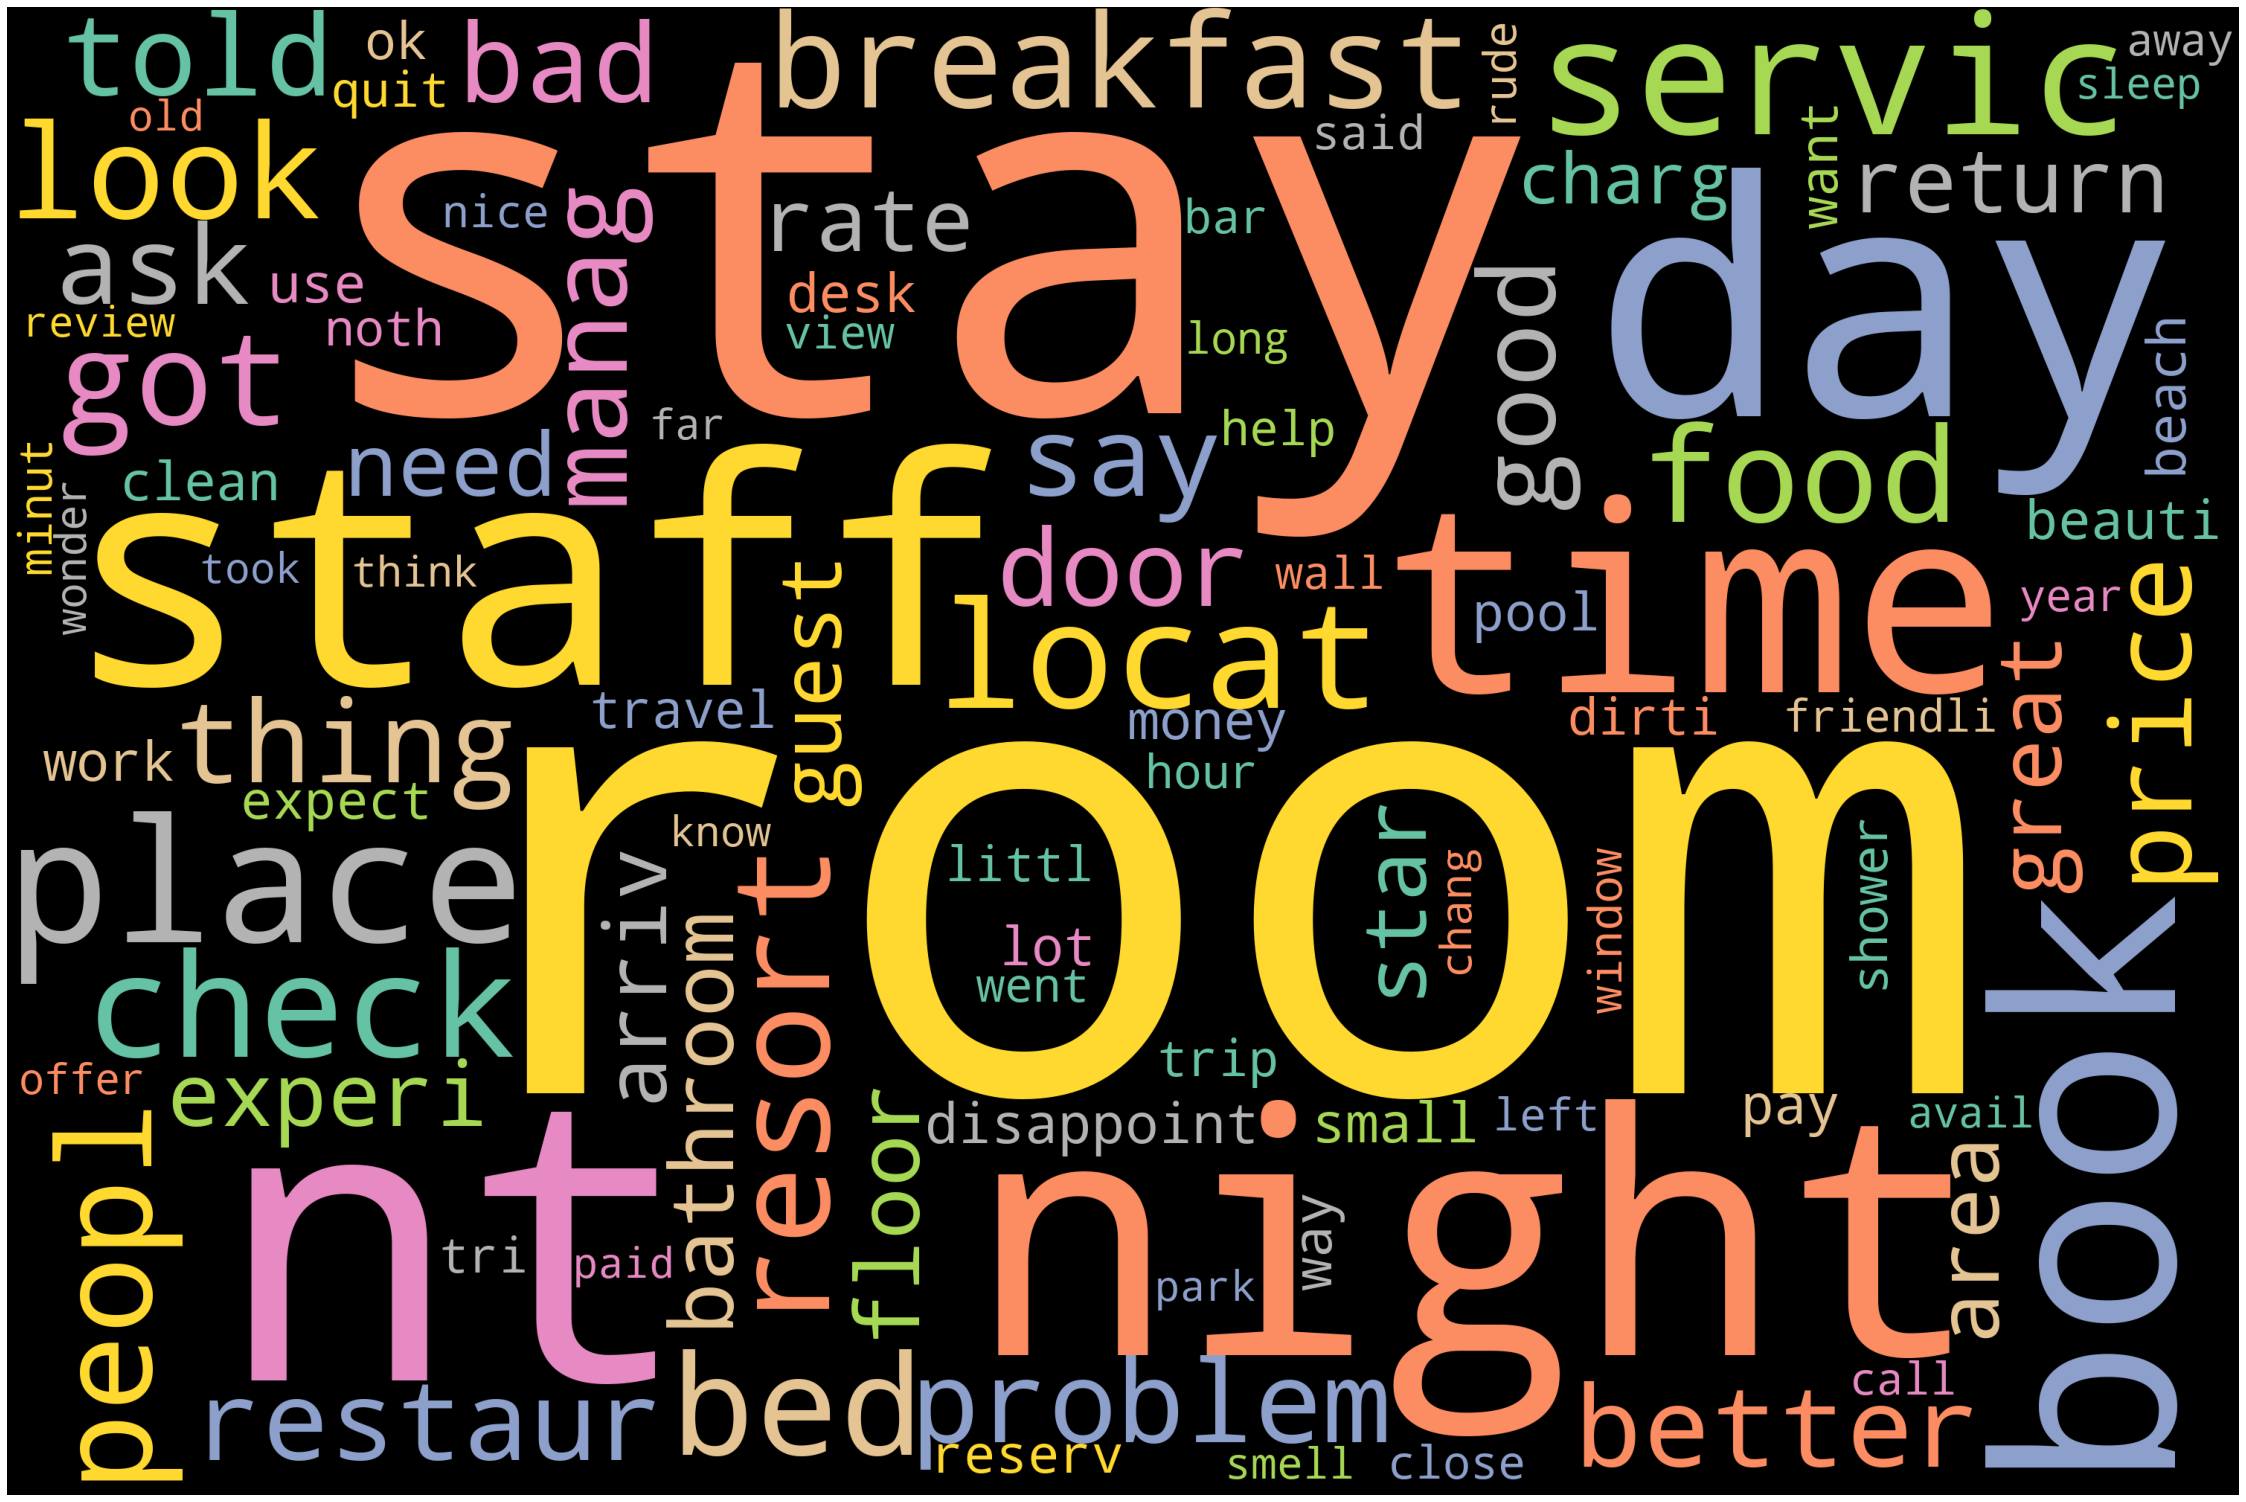

In [104]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [105]:
# Wordcloud for Negative reviews

In [106]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [107]:
text = ' '.join(Negative_senti['cleaned_1'])

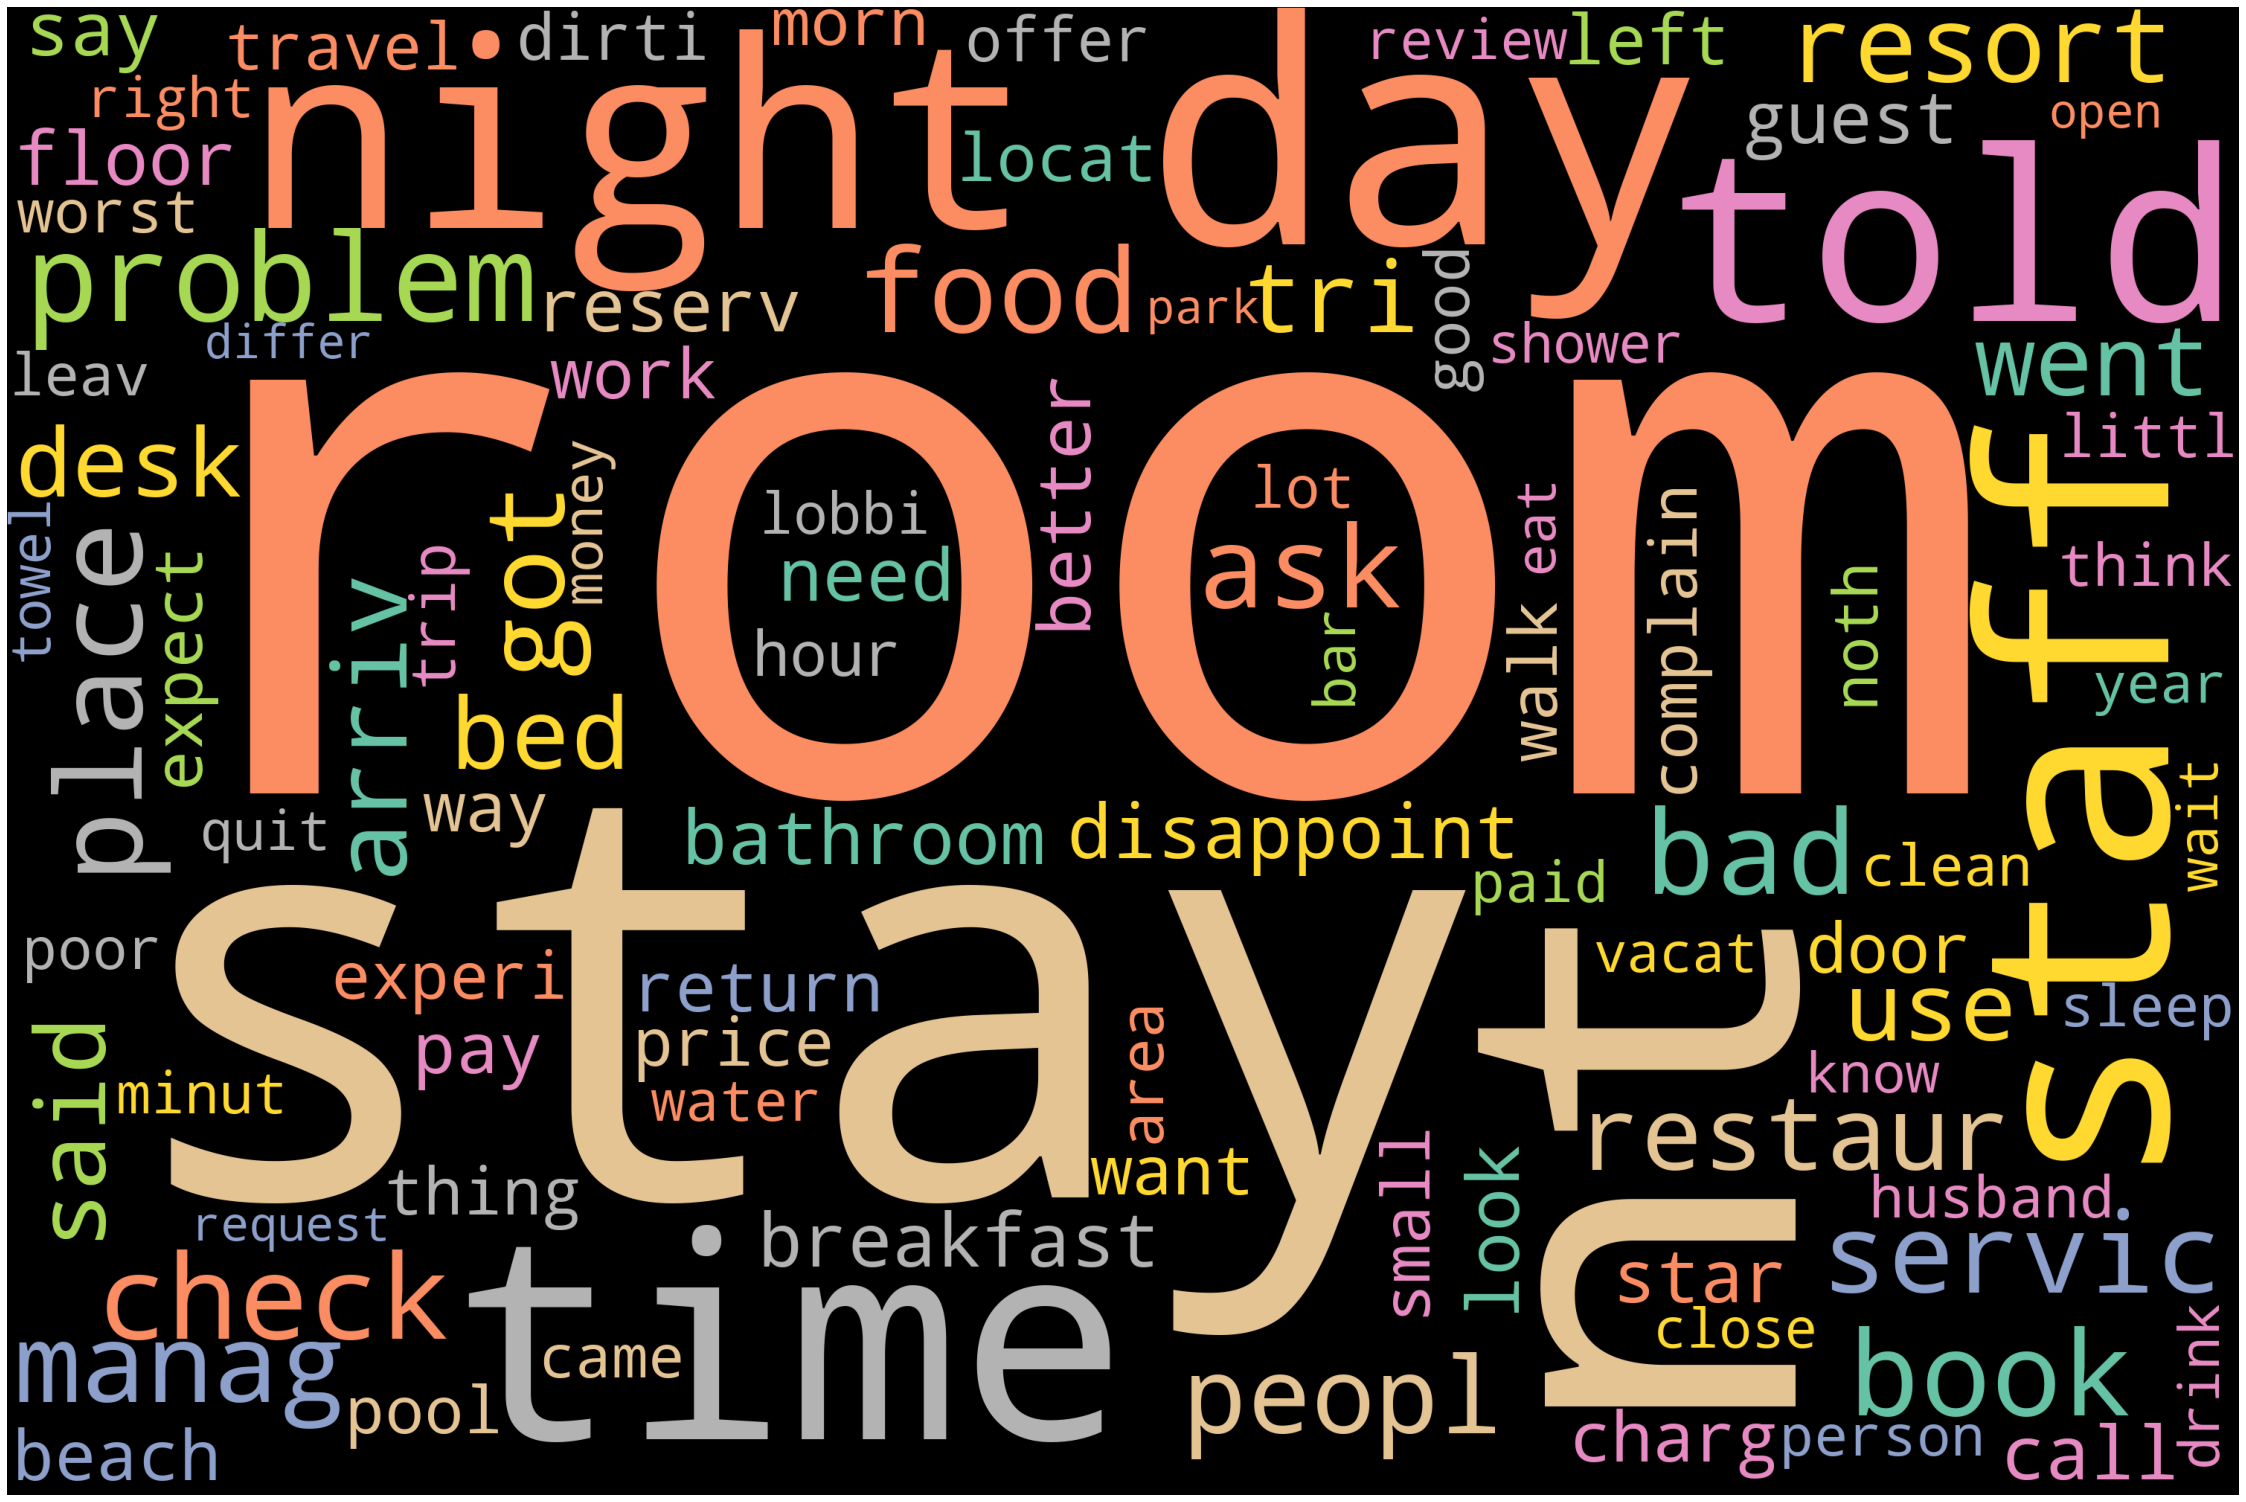

In [108]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

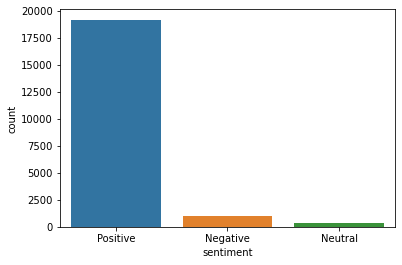

In [109]:
import seaborn as sns
sns.countplot(x='sentiment',data=df)
plt.show()

# Feature Extraction
#### for positive reviews

In [111]:
Positive_senti.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not  experience hotel monaco seattl...       3   
3  unique great stay wonderful time hotel monaco ...       5   
4  great stay great stay went seahawk game awesom...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                        expandedtext  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not experience hotel monaco seattle...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopw  \
0  [nice, hotel, expensive, parking, got, good, d...     80   
1  [ok, nothing, special, charge, diamond, member...    228   
2  [nice, rooms, not, experience, hotel, monaco, ...    195   
3  [unique, great, stay, wonderful, time, hotel, ...     85   
4  [great, stay, great, stay, went, seahawk, game...    178   

                                   stopwords_removed  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms experience hotel monaco seattle goo...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             stemmed  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room experi hotel monaco seattl good hote...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                               lemma  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room experi hotel monaco seattl good hote...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                             cleaned  \
0  [nice, expens, park, got, good, deal, stay, an...   
1  [ok, noth, special, charg, diamond, member, hi...   
2  [nice, room, experi, monaco, seattl, good, nt,...   
3  [uniqu, great, stay, wonder, time, monaco, loc...   
4  [great, stay, great, stay, went, seahawk, game...   

                                           cleaned_1  polarity  \
0  nice expens park got good deal stay anniversar...  0.353265   
1  ok noth special charg diamond member hilton de...  0.323800   
2  nice room experi monaco seattl good nt levelpo...  0.294513   
3  uniqu great stay wonder time monaco locat shor...  0.455556   
4  great stay great stay went seahawk game awesom...  0.424351   

   sentiment_value sentiment  
0               24  Positive  
1               37  Positive  
2               25  Positive  
3               27  Positive  
4               22  Positive

In [112]:
positive_rev=Positive_senti['cleaned_1']

In [113]:
positive_rev=pd.DataFrame(data=positive_rev)

In [114]:
positive_rev

cleaned_1
0      nice expens park got good deal stay anniversar...
1      ok noth special charg diamond member hilton de...
2      nice room experi monaco seattl good nt levelpo...
3      uniqu great stay wonder time monaco locat shor...
4      great stay great stay went seahawk game awesom...
...                                                  ...
20485  impress unfriendli staff check ask higher floo...
20486  best kept secret time stay charm star ca nt be...
20487  great locat price view great quick place sight...
20488  ok look nice modern outsid desk staff nt frien...
20490  peopl talk ca nt believ rate nt ye patricia ex...

[19161 rows x 1 columns]

In [115]:
# Count Vectorization on Positive reviews/BOW

In [116]:
positive_rev = [cleaned_1.strip() for cleaned_1 in positive_rev.cleaned_1] # remove both the leading and the trailing characters
positive_rev = [cleaned_1 for cleaned_1 in positive_rev if cleaned_1] # removes empty strings, because they are considered in Python as False
positive_rev[0:10]

['nice expens park got good deal stay anniversari arriv late even took advic previou review valet park check quick easi littl disappoint nonexist view room room clean nice size bed comfort woke stiff neck high pillow soundproof like heard music room night morn loud bang door open close hear peopl talk hallway mayb noisi neighbor aveda bath product nice goldfish stay nice touch taken advantag stay longer locat great walk distanc shop overal nice experi pay park night',
 'ok noth special charg diamond member hilton decid chain shot anniversari seattl start book suit paid extra websit descript suit bedroom bathroom standard room took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast got kid embassi suit sit room bathroom bedroom unlik kimpton call suit day stay offer correct fals advertis send kimpton prefer guest websit email ask failur provid suit advertis websit reserv descript furnish hard copi reserv printout 

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(positive_rev)

In [118]:
print(vectorizer.vocabulary_)

{'nice': 34526, 'expens': 18341, 'park': 37668, 'got': 22379, 'good': 22180, 'deal': 13571, 'stay': 49176, 'anniversari': 2110, 'arriv': 3030, 'late': 28976, 'even': 17736, 'took': 52975, 'advic': 703, 'previou': 40204, 'review': 43363, 'valet': 55719, 'check': 9640, 'quick': 41233, 'easi': 16193, 'littl': 29797, 'disappoint': 14749, 'nonexist': 35083, 'view': 56163, 'room': 43933, 'clean': 10430, 'size': 47076, 'bed': 5304, 'comfort': 11191, 'woke': 58223, 'stiff': 49410, 'neck': 34209, 'high': 24295, 'pillow': 38757, 'soundproof': 48074, 'like': 29581, 'heard': 23810, 'music': 33826, 'night': 34674, 'morn': 33354, 'loud': 30334, 'bang': 4363, 'door': 15397, 'open': 36356, 'close': 10659, 'hear': 23807, 'peopl': 38192, 'talk': 50945, 'hallway': 23335, 'mayb': 31691, 'noisi': 34984, 'neighbor': 34333, 'aveda': 3691, 'bath': 4785, 'product': 40595, 'goldfish': 22140, 'touch': 53153, 'taken': 50921, 'advantag': 670, 'longer': 30199, 'locat': 29985, 'great': 22585, 'walk': 56592, 'distanc

In [119]:
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [120]:
word_freq_df.sort_values('occurrences',ascending=False)

term  occurrences
43933            room        43120
49176            stay        26546
22585           great        20984
35455              nt        17773
22180            good        16875
...               ...          ...
24021     helpfullbut            1
24022   helpfullhotel            1
24023      helpfullit            1
24025  helpfullplenti            1
59262       zzzzzzzzz            1

[59263 rows x 2 columns]

In [121]:
# Count Vectorization on Negative reviews

In [122]:
negative_rev=Negative_senti['cleaned_1']
negative_rev=pd.DataFrame(data=negative_rev)

In [123]:
negative_rev = [cleaned_1.strip() for cleaned_1 in negative_rev.cleaned_1] # remove both the leading and the trailing characters
negative_rev = [cleaned_1 for cleaned_1 in negative_rev if cleaned_1] # removes empty strings, because they are considered in Python as False
negative_rev[0:10]

['warwick bad good review warwick shock staff quit rude room fairli dirti cut ask bandaid request bottl open better servic',
 'austin power decor familiar seattlewher sheet differ color hairbut okbecaus clean second dayth bathroom friend cringesh ask brought flip flop sanit sprayth dirti shag carpet nt wallit crawl inchesi star saw shine wors',
 'hate inn terribl roomservic horribl staff unwelcom decor recent updat lack complet look manag staff horribl',
 'stay clear internet reserv friday rang hour later add thursday book thursday rang let know arriv late said problem arriv hear oh nt book tonight nt room total apathi concern say sorri look reserv book sorri apathi final say bb door call author hang say sorri time incompet manag employe complet sour trip stay away',
 'worst experi book nonsmok room onlin advanc stay crown plaza downtown seattl arriv desk staff ask consid smoke room complet unaccept famili clearli state consid smoke room mainli concern infant daughter health particular

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(negative_rev)

In [125]:
print(vectorizer.vocabulary_)

{'warwick': 8665, 'bad': 607, 'good': 3375, 'review': 6555, 'shock': 7044, 'staff': 7441, 'quit': 6217, 'rude': 6695, 'room': 6631, 'fairli': 2862, 'dirti': 2222, 'cut': 1928, 'ask': 467, 'bandaid': 644, 'request': 6467, 'bottl': 968, 'open': 5465, 'better': 826, 'servic': 6955, 'austin': 544, 'power': 5997, 'decor': 2038, 'familiar': 2876, 'seattlewher': 6876, 'sheet': 7024, 'differ': 2197, 'color': 1557, 'hairbut': 3548, 'okbecaus': 5420, 'clean': 1464, 'second': 6881, 'dayth': 1989, 'bathroom': 698, 'friend': 3191, 'cringesh': 1870, 'brought': 1047, 'flip': 3036, 'flop': 3055, 'sanit': 6770, 'sprayth': 7419, 'shag': 7003, 'carpet': 1217, 'nt': 5333, 'wallit': 8641, 'crawl': 1847, 'inchesi': 3975, 'star': 7483, 'saw': 6800, 'shine': 7034, 'wors': 8906, 'hate': 3613, 'inn': 4062, 'terribl': 7848, 'roomservic': 6654, 'horribl': 3786, 'unwelcom': 8425, 'recent': 6299, 'updat': 8431, 'lack': 4359, 'complet': 1618, 'look': 4568, 'manag': 4691, 'stay': 7505, 'clear': 1475, 'internet': 4105

In [126]:
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [127]:
word_freq_df.sort_values('occurrences',ascending=False)

term  occurrences
6631          room         2611
7505          stay         1334
5333            nt         1001
5223         night          694
1972           day          679
...            ...          ...
3832    hotelthank            1
3830      hotelsth            1
3829    hotelstaff            1
3828  hotelssherri            1
9006        zoolik            1

[9007 rows x 2 columns]

In [128]:
# TFidf vectorizer
# Positive Reviews

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(positive_rev)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaa', 'abl', 'abl check', 'abl walk', 'absolut', 'absolut beauti', 'absolut love', 'absolut wonder', 'abund', 'ac', 'ac work', 'accept', 'access', 'access internet', 'access room', 'accommod', 'accomod', 'accord', 'account', 'accur', 'acknowledg', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'addit', 'address', 'adequ', 'adjac', 'adjoin', 'adjoin room', 'adjust', 'admit', 'adult', 'adult child', 'advanc', 'advantag', 'adventur', 'advertis', 'advic', 'advis', 'advisor', 'aerob', 'affect', 'affinia', 'afford', 'afraid', 'afternoon', 'afternoon tea', 'age', 'agenc', 'agent', 'aggress', 'ago', 'agre', 'agre review', 'ahead', 'ahead time', 'air', 'air condit', 'air condit work', 'air condition', 'aircon', 'aircondit', 'airi', 'airlin', 'airport', 'airport bu', 'airport shuttl', 'al', 'ala', 'ala cart', 'ala cart restaur', 'alarm', 'alarm clock', 'albeit', 'alcatraz', 'alcohol', 'alley', 'allinclus', 'allinclus resort', 'alloc', 'allow', 'alot', 'alright', 'altern', 'amaz', 'amaz room'

In [130]:
# TFidf vectorizer
# Negative reviews

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(negative_rev)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['abandon', 'abl', 'abl eat', 'abl sleep', 'abroad', 'absolut', 'absolut beauti', 'absolut noth', 'absolut worst', 'abysm', 'ac', 'ac work', 'accept', 'accept room', 'access', 'accid', 'accommod', 'accomod', 'accompani', 'accor', 'accord', 'account', 'account depart', 'accross', 'accur', 'accus', 'acknowledg', 'act', 'action', 'activ', 'actual', 'actual stay', 'ad', 'adagio', 'add', 'addit', 'addit night', 'address', 'adequ', 'adjac', 'adjoin', 'adjoin room', 'adjust', 'administr', 'admit', 'adult', 'adult child', 'advanc', 'advanc room', 'advantag', 'advertis', 'advic', 'advic stay', 'advis', 'advis stay', 'advisor', 'affect', 'afford', 'afraid', 'afternoon', 'age', 'agenc', 'agent', 'aggrav', 'ago', 'agre', 'agre review', 'agusti', 'ahead', 'air', 'air condit', 'air condit work', 'air condition', 'aircon', 'aircondit', 'airi', 'airlin', 'airport', 'al', 'al la', 'al la cart', 'alarm', 'alarm clock', 'alcohol', 'aliv', 'allerg', 'allergi', 'alley', 'allinclus', 'alloc', 'alloc room', 

In [193]:
## Bi-gram for Positive reviews

In [194]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [200]:
# Top 20 Bi-gram words
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(Positive_senti['cleaned_1'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(20)

Bi-gram  Freq
0        great locat  2184
1     staff friendli  2142
2         room clean  2019
3         stay night  1767
4              ca nt  1735
5         minut walk  1638
6         punta cana  1585
7       walk distanc  1412
8      friendli help  1390
9   highli recommend  1317
10       room servic  1221
11        place stay  1182
12        staff help  1173
13         room nice  1061
14        room small   990
15       read review   946
16       locat great   900
17        room floor   876
18       great place   854
19        great time   848

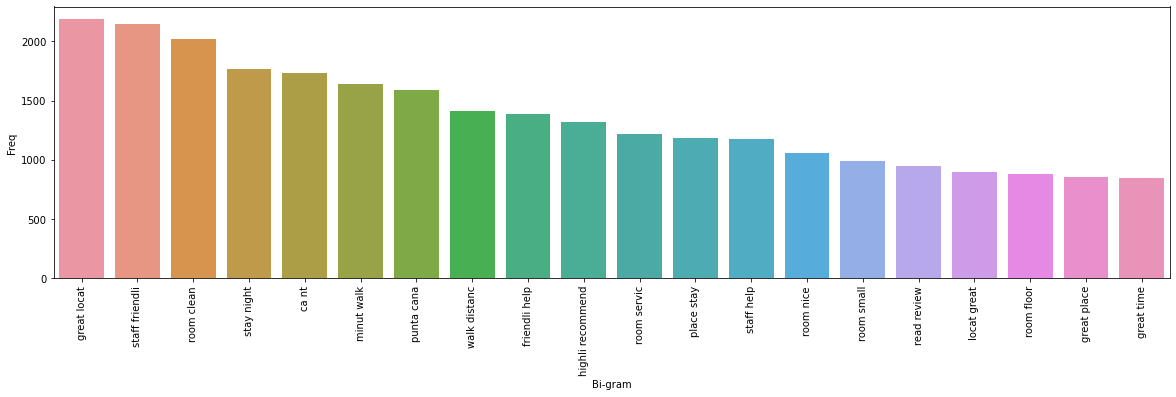

In [201]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

In [202]:
#Bi-gram for Negative reviews

In [203]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [204]:
# Top 20 Bi-gram words
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(Negative_senti['cleaned_1'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(20)

Bi-gram  Freq
0      credit card    85
1       punta cana    77
2    custom servic    69
3       stay night    67
4       room small    64
5            ca nt    60
6      room servic    59
7       air condit    57
8          nt work    51
9          nt stay    50
10        san juan    46
11  staff friendli    42
12      night stay    41
13       room room    41
14      desk staff    39
15       book room    39
16         room nt    39
17      room clean    38
18       stay away    35
19      room readi    34

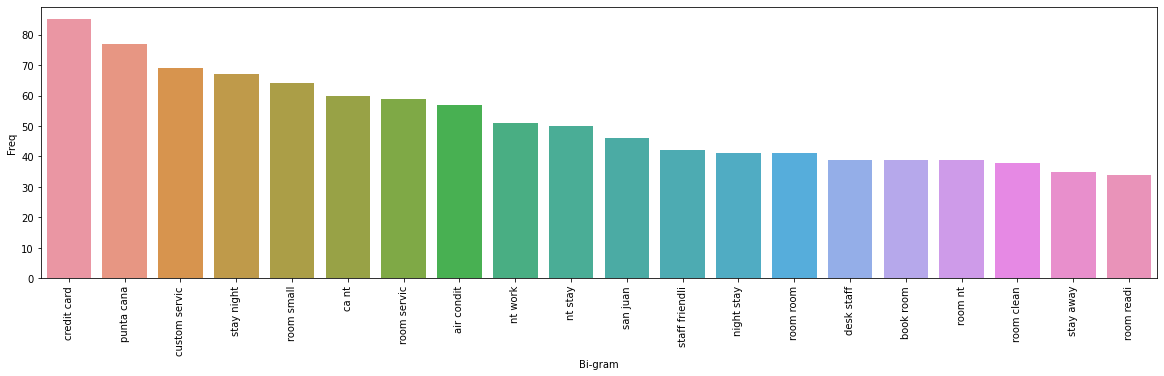

In [205]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

In [132]:
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not  experience hotel monaco seattl...       3   
3  unique great stay wonderful time hotel monaco ...       5   
4  great stay great stay went seahawk game awesom...       5   

                                         no_contract  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                        expandedtext  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not experience hotel monaco seattle...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, not, experience, hotel, monaco, ...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                               lower  stopw  \
0  [nice, hotel, expensive, parking, got, good, d...     80   
1  [ok, nothing, special, charge, diamond, member...    228   
2  [nice, rooms, not, experience, hotel, monaco, ...    195   
3  [unique, great, stay, wonderful, time, hotel, ...     85   
4  [great, stay, great, stay, went, seahawk, game...    178   

                                   stopwords_removed  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms experience hotel monaco seattle goo...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             stemmed  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room experi hotel monaco seattl good hote...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                               lemma  \
0  nice hotel expens park got good deal stay hote...   
1  ok noth special charg diamond member hilton de...   
2  nice room experi hotel monaco seattl good hote...   
3  uniqu great stay wonder time hotel monaco loca...   
4  great stay great stay went seahawk game awesom...   

                                             cleaned  \
0  [nice, expens, park, got, good, deal, stay, an...   
1  [ok, noth, special, charg, diamond, member, hi...   
2  [nice, room, experi, monaco, seattl, good, nt,...   
3  [uniqu, great, stay, wonder, time, monaco, loc...   
4  [great, stay, great, stay, went, seahawk, game...   

                                           cleaned_1  polarity  \
0  nice expens park got good deal stay anniversar...  0.353265   
1  ok noth special charg diamond member hilton de...  0.323800   
2  nice room experi monaco seattl good nt levelpo...  0.294513   
3  uniqu great stay wonder time monaco locat shor...  0.455556   
4  great stay great stay went seahawk game awesom...  0.424351   

   sentiment_value sentiment  
0               24  Positive  
1               37  Positive  
2               25  Positive  
3               27  Positive  
4               22  Positive

In [133]:
df.to_csv(r'finaldata2.csv',index=True)

In [134]:
corpus = df['cleaned_1'].tolist()

In [135]:
corpus

['nice expens park got good deal stay anniversari arriv late even took advic previou review valet park check quick easi littl disappoint nonexist view room room clean nice size bed comfort woke stiff neck high pillow soundproof like heard music room night morn loud bang door open close hear peopl talk hallway mayb noisi neighbor aveda bath product nice goldfish stay nice touch taken advantag stay longer locat great walk distanc shop overal nice experi pay park night',
 'ok noth special charg diamond member hilton decid chain shot anniversari seattl start book suit paid extra websit descript suit bedroom bathroom standard room took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast got kid embassi suit sit room bathroom bedroom unlik kimpton call suit day stay offer correct fals advertis send kimpton prefer guest websit email ask failur provid suit advertis websit reserv descript furnish hard copi reserv printout 

In [136]:
df['sentiment'] = df['sentiment'].replace({'Negative': -1})
df['sentiment'] = df['sentiment'].replace({'Positive': 1})
df['sentiment'] = df['sentiment'].replace({'Neutral': 0})

In [137]:
senti_into_number_form=df['sentiment']

In [138]:
senti_into_number_form

0        1
1        1
2        1
3        1
4        1
        ..
20486    1
20487    1
20488    1
20489   -1
20490    1
Name: sentiment, Length: 20491, dtype: int64

In [139]:
#corpus converted into array using TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer3 = TfidfVectorizer(max_features=4000)
idf= vectorizer3.fit_transform(corpus).toarray()

In [140]:
idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [141]:
import pickle
pickle_out=open('vectorizer3.pkl','wb')
pickle.dump(vectorizer3,pickle_out)
pickle_out.close()

In [142]:
xtfidf = pd.DataFrame(idf)
xtfidf

0     1     2     3     4         5     6     7     8         9     \
0       0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  0.000000   
1       0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  0.000000   
2       0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  0.063758   
3       0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  0.000000   
4       0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  0.000000   
...     ...   ...   ...   ...   ...       ...   ...   ...   ...       ...   
20486   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  0.000000   
20487   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  0.000000   
20488   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  0.000000   
20489   0.0   0.0   0.0   0.0   0.0  0.040451   0.0   0.0   0.0  0.000000   
20490   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  0.000000   

       ...  3990  3991  3992  3993  3994  3995  3996  3997  3998  3999  
0      ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
20486  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
20487  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
20488  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
20489  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
20490  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[20491 rows x 4000 columns]

In [143]:
#target var
ytfidf=pd.DataFrame(senti_into_number_form)
ytfidf.value_counts() # checking whethet data is balanced or imbalanced

sentiment
 1           19161
-1             997
 0             333
dtype: int64

# Train and Test split

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_traintfidf, x_testtfidf,y_traintfidf,y_testtfidf = train_test_split(xtfidf,ytfidf, test_size=0.33,random_state=0)

In [147]:
x_traintfidf.shape,y_traintfidf.shape, x_testtfidf.shape,y_testtfidf.shape

((13728, 4000), (13728, 1), (6763, 4000), (6763, 1))

In [148]:
# Balancing the splitted (tfidf) data using SMOTE method

In [149]:
from imblearn.over_sampling import SMOTE

In [150]:
upsample = SMOTE()
x_traintfidf1, y_traintfidf1 = upsample.fit_resample(x_traintfidf, y_traintfidf)

In [151]:
#target y
ytfidf1=pd.DataFrame(y_traintfidf1)
ytfidf1.value_counts()

sentiment
-1           12811
 0           12811
 1           12811
dtype: int64

In [152]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.LogisticRegression

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
lr= LogisticRegression()
lr.fit(x_traintfidf1,y_traintfidf1)
y_pred_test_lr=lr.predict(x_testtfidf)
y_pred_train_lr=lr.predict(x_traintfidf1)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [156]:
# accuracy score
accuracy_train_LR=accuracy_score(y_traintfidf1,y_pred_train_lr)*100
accuracy_test_LR= accuracy_score(y_testtfidf, y_pred_test_lr) * 100
print('Accuracy of Training data =',accuracy_train_LR)
print("Accuracy of Test data =", accuracy_test_LR)

Accuracy of Training data = 99.14656675253038
Accuracy of Test data = 93.12435309773768


In [157]:
print(classification_report(y_testtfidf, y_pred_test_lr))

              precision    recall  f1-score   support

          -1       0.48      0.74      0.58       307
           0       0.11      0.17      0.13       106
           1       0.99      0.95      0.97      6350

    accuracy                           0.93      6763
   macro avg       0.53      0.62      0.56      6763
weighted avg       0.95      0.93      0.94      6763



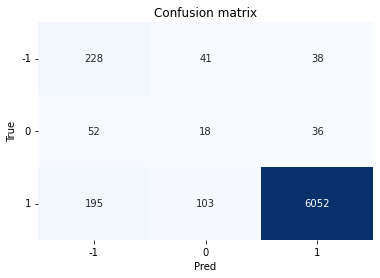

In [158]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, y_pred_test_lr)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

# cross validation -StratifiedKFold

In [209]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

### cross validation on imbalanced dataset

In [253]:
skfold=StratifiedKFold(n_splits=10)
model=LogisticRegression()
scores=cross_val_score(model,xtfidf,ytfidf,cv=skfold)
print(np.mean(scores))

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d arr

0.9533453796617029


# 2.Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
# Random Forest classification on TFIDF features on balanced data

In [162]:
RF= RandomForestClassifier()
RF.fit(x_traintfidf1,y_traintfidf1)
y_pred_test_RF=RF.predict(x_testtfidf)
y_pred_train_RF=RF.predict(x_traintfidf1)


C:\Users\HP\AppData\Local\Temp\ipykernel_12016\3224386901.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_traintfidf1,y_traintfidf1)


In [163]:
# accuracy score
accuracy_train_RF=accuracy_score(y_traintfidf1,y_pred_train_RF)*100
accuracy_test_RF= accuracy_score(y_testtfidf, y_pred_test_RF) * 100
print('Accuracy of Training data =',accuracy_train_RF)
print("Accuracy of Test data =", accuracy_test_RF)

Accuracy of Training data = 100.0
Accuracy of Test data = 94.41076445364483


In [164]:
print(classification_report(y_testtfidf, y_pred_test_RF))

              precision    recall  f1-score   support

          -1       0.57      0.33      0.42       307
           0       0.00      0.00      0.00       106
           1       0.95      0.99      0.97      6350

    accuracy                           0.94      6763
   macro avg       0.51      0.44      0.46      6763
weighted avg       0.92      0.94      0.93      6763



C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


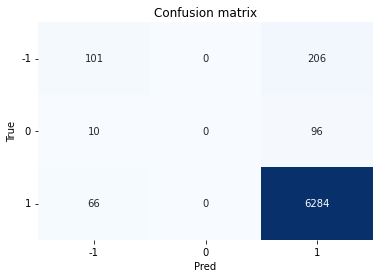

In [165]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, y_pred_test_RF)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

### cross validation

In [211]:
skfold=StratifiedKFold(n_splits=10)
model=RandomForestClassifier()
scores=cross_val_score(model,xtfidf,ytfidf,cv=skfold)
print(np.mean(scores))

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_va

0.9375335745329927


# 3. SVM

In [167]:
from sklearn.svm import LinearSVC

In [168]:
# SVM classification on TFIDF features on balanced data

In [169]:
SVM= LinearSVC()
SVM.fit(x_traintfidf1,y_traintfidf1)
y_pred_test_SVM=SVM.predict(x_testtfidf)
y_pred_train_SVM=SVM.predict(x_traintfidf1)



C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [170]:
print(classification_report(y_testtfidf, y_pred_test_SVM))

              precision    recall  f1-score   support

          -1       0.60      0.68      0.64       307
           0       0.10      0.08      0.09       106
           1       0.98      0.98      0.98      6350

    accuracy                           0.95      6763
   macro avg       0.56      0.58      0.57      6763
weighted avg       0.95      0.95      0.95      6763



In [171]:
accuracy_train_SVM=accuracy_score(y_traintfidf1,y_pred_train_SVM)*100
accuracy_test_SVM= accuracy_score(y_testtfidf, y_pred_test_SVM) * 100
print('Accuracy of Training data =',accuracy_train_SVM)
print("Accuracy of Test data =", accuracy_test_SVM)

Accuracy of Training data = 99.9375536648193
Accuracy of Test data = 94.88392725121987


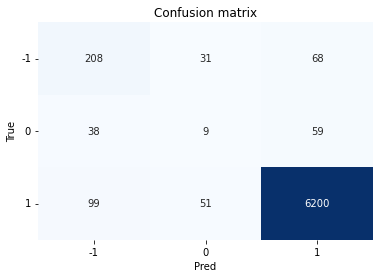

In [172]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, y_pred_test_SVM)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

### cross validation 

In [254]:
skfold=StratifiedKFold(n_splits=10)
model=LinearSVC()
scores=cross_val_score(model,xtfidf,ytfidf,cv=skfold)
print(np.mean(scores))

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d arr

0.9596408003904344


# 4. Naive Bayes classifier for multinomial models

In [174]:
from sklearn.naive_bayes import MultinomialNB

In [175]:
# Multinomial on TFIDF features on balanced data

In [214]:
MULT_NB= MultinomialNB()
MULT_NB.fit(x_traintfidf1,y_traintfidf1)
y_pred_test_mult_nb=MULT_NB.predict(x_testtfidf)
y_pred_train_mult_nb=MULT_NB.predict(x_traintfidf1)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [215]:
accuracy_train_MULT_NB=accuracy_score(y_traintfidf1,y_pred_train_mult_nb)*100
accuracy_test_MULT_NB= accuracy_score(y_testtfidf, y_pred_test_mult_nb) * 100
print('Accuracy of Training data =',accuracy_train_MULT_NB)
print("Accuracy of Test data =", accuracy_test_MULT_NB)

Accuracy of Training data = 94.22111206515234
Accuracy of Test data = 87.5942629010794


In [216]:
print(classification_report(y_testtfidf, y_pred_test_mult_nb))

              precision    recall  f1-score   support

          -1       0.28      0.74      0.40       307
           0       0.07      0.10      0.08       106
           1       0.98      0.90      0.94      6350

    accuracy                           0.88      6763
   macro avg       0.44      0.58      0.47      6763
weighted avg       0.94      0.88      0.90      6763



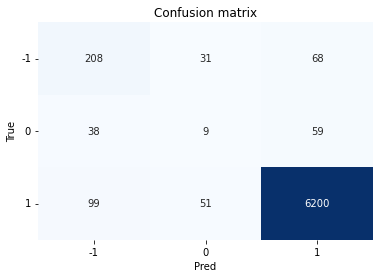

In [179]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, y_pred_test_mult_nb)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

### cross validation

In [223]:
skfold=StratifiedKFold(n_splits=10)
model=MultinomialNB()
scores=cross_val_score(model,xtfidf,ytfidf,cv=skfold)
print(np.mean(scores))

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d arr

0.9363622952711033


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 5. AdaBoost classifier on tfidf features

In [181]:
from sklearn.ensemble import AdaBoostClassifier

In [182]:
#Adaoost on TFIDF features

In [183]:
ADA= AdaBoostClassifier()
ADA.fit(x_traintfidf1,y_traintfidf1)
y_pred_test_ada=ADA.predict(x_testtfidf)
y_pred_train_ada=ADA.predict(x_traintfidf1)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [184]:
accuracy_train_ADA=accuracy_score(y_traintfidf1,y_pred_train_ada)*100
accuracy_test_ADA= accuracy_score(y_testtfidf, y_pred_test_ada) * 100
print('Accuracy of Training data =',accuracy_train_ADA)
print("Accuracy of Test data =", accuracy_test_ADA)

Accuracy of Training data = 82.44217209169203
Accuracy of Test data = 87.13588644092857


In [185]:
print(classification_report(y_testtfidf, y_pred_test_ada))

              precision    recall  f1-score   support

          -1       0.48      0.37      0.42       307
           0       0.09      0.60      0.15       106
           1       0.99      0.90      0.94      6350

    accuracy                           0.87      6763
   macro avg       0.52      0.63      0.50      6763
weighted avg       0.95      0.87      0.91      6763



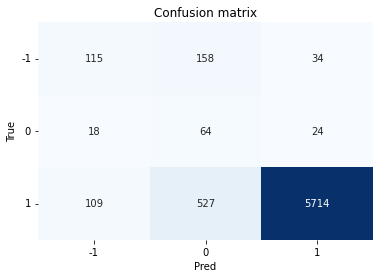

In [186]:
from sklearn import metrics
classes = np.unique(y_testtfidf)
cm0 = metrics.confusion_matrix(y_testtfidf, y_pred_test_ada)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

### cross validation

In [256]:
skfold=StratifiedKFold(n_splits=10)
model=AdaBoostClassifier()
scores=cross_val_score(model,xtfidf,ytfidf,cv=skfold)
print(np.mean(scores))

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d arr

0.9527109476365627


In [238]:
AS={'Models':['Logistic Regression(TFIDF)','Random Forest(TFIDF)','LinearSVC(TFIDF)', 'Multinomial Naive Bayes(TFIDF)','AdaBoostClassifier(TFIDF)'],
     'Train Accuracy':[accuracy_train_LR,accuracy_train_RF,accuracy_train_SVM,accuracy_train_MULT_NB,accuracy_train_ADA],
    'Test Accuracy':[accuracy_test_LR,accuracy_test_RF,accuracy_test_SVM,accuracy_test_MULT_NB,accuracy_test_ADA],
    'F1-score':[ 0.97, 0.97,0.98,0.94,0.94],
    'precision':[0.99, 0.95,0.98,0.98,0.99],
    'Recall':[0.95, 0.99,0.98,0.90,0.90],
    'cvscore_on_imbalaced_ds':[0.95,0.93,0.95,0.93,0.95]
   }                            

In [239]:
Model_Acc=pd.DataFrame(AS, index =[1,2,3,4,5])

In [240]:
Model_Acc

Models  Train Accuracy  Test Accuracy  F1-score  \
1      Logistic Regression(TFIDF)       99.146567      93.124353      0.97   
2            Random Forest(TFIDF)      100.000000      94.410764      0.97   
3                LinearSVC(TFIDF)       99.937554      94.883927      0.98   
4  Multinomial Naive Bayes(TFIDF)       94.221112      87.594263      0.94   
5       AdaBoostClassifier(TFIDF)       82.442172      87.135886      0.94   

   precision  Recall  cvscore_on_imbalaced_ds  
1       0.99    0.95                     0.95  
2       0.95    0.99                     0.93  
3       0.98    0.98                     0.95  
4       0.98    0.90                     0.93  
5       0.99    0.90                     0.95

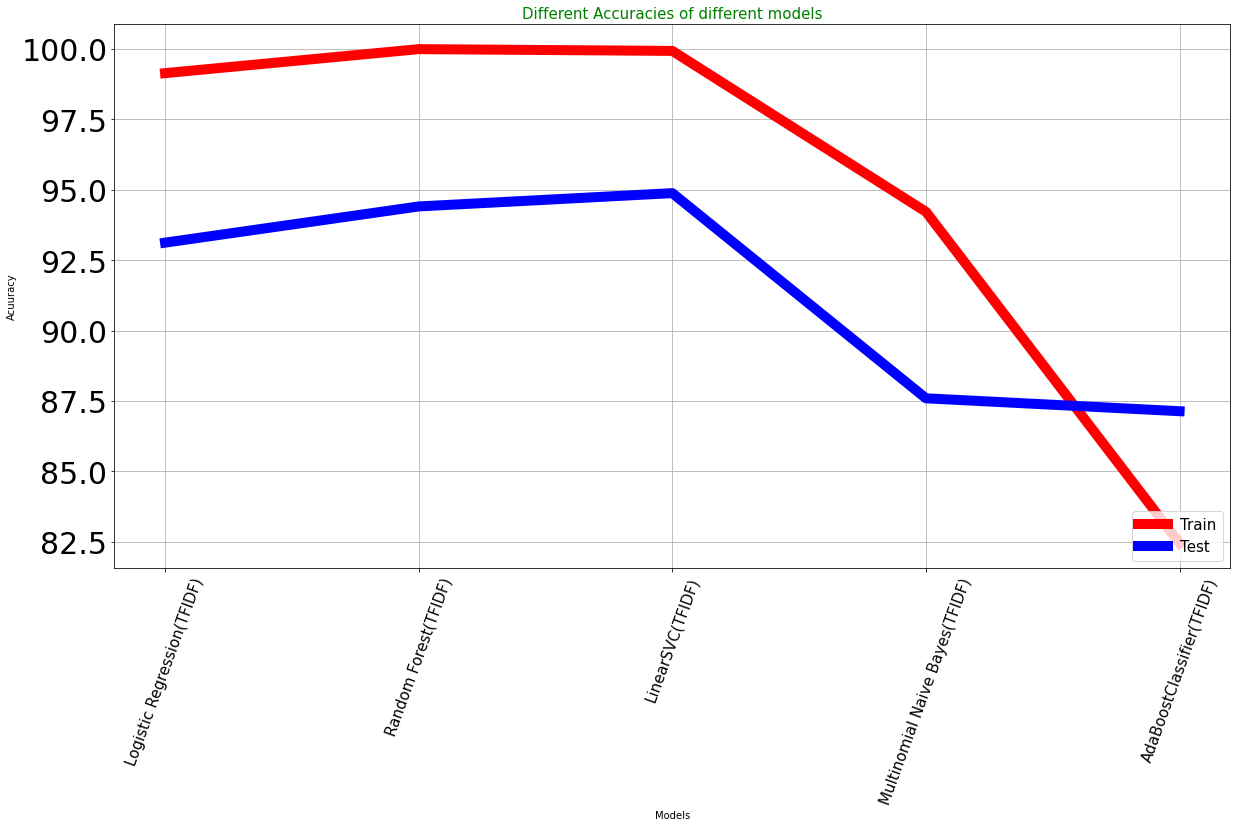

In [241]:
plt.figure(figsize =(20, 10))
plt.plot(Model_Acc['Models'],Model_Acc['Train Accuracy'],c='red', lw=10)
plt.plot(Model_Acc['Models'],Model_Acc['Test Accuracy'],c='blue', lw=10)
plt.title('Different Accuracies of different models',fontdict={'fontsize': 15,'fontweight' : 15,'color' : 'g'})
plt.xlabel('Models')
plt.ylabel('Acuuracy')
plt.legend(['Train', 'Test'], loc='lower right',fontsize=15)
plt.yticks(fontsize=30)
plt.xticks(rotation=70, fontsize=15)
plt.grid()
plt.show();

# prediction

In [272]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet=WordNetLemmatizer()
cv = CountVectorizer()

In [273]:
!pip install rake-nltk

Defaulting to user installation because normal site-packages is not writeable


In [274]:
from rake_nltk import Rake

In [275]:
def clean_text(a):
    print("Number of words in Review:", len(a.split()))
    text=re.sub('[^A-za-z0-9]',' ',a)
    text=text.lower()
    text=text.split(' ')
    text = [wordnet.lemmatize(word) for word in text if word not in (stopwords.words('english'))]
    text = ' '.join(text)
    top2_words = get_top_n2_words([text],n=5) 
    df = pd.DataFrame(top2_words)
    df.columns=["Bi-gram", "Freq"]
    print(df)
   
    return text

In [276]:
def expression_check(prediction_input):
    if prediction_input == -1:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print(" Input statement has Neutral Sentiment.")

In [280]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = clean_text(input)
    transformed_input = vectorizer3.transform([input])
    prediction = SVM.predict(transformed_input)
    expression_check(prediction)
    r = Rake(language='english', stopwords=STOPWORDS)
    r.extract_keywords_from_text(input)
    r.get_ranked_phrases()
    print(r.get_ranked_phrases())

In [281]:
a=('Looked a 3 night stay  breakfast was a samples  you had to wait to be called to line up  shouted at by a member of staff in the breakfast room for lining up to soon  chef putting bread in the coaster with bear hands  chef having a mask round his neck  Making one cocktail  enough for one and putting it in two glass   they went back 3 time until we got a full glass  made to feel uncomfortable an unwelcome  ')

In [282]:
sentiment_predictor(a)

Number of words in Review: 80
            Bi-gram  Freq
0      looked night     1
1        night stay     1
2    stay breakfast     1
3  breakfast sample     1
4       sample wait     1
Input statement has Positive Sentiment.
['looked 3 night stay breakfast sample wait called line shouted member staff breakfast room lining soon chef putting bread coaster bear hand chef mask round neck making one cocktail enough one putting two glass went back 3 time got full glass made feel uncomfortable unwelcome']


In [283]:
import pickle
from pickle import load
from pickle import dump

In [284]:
pickle_out=open('SVM.pkl','wb')
pickle.dump(SVM,pickle_out)
pickle_out.close()